### Load Packages

In [2]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance
from random import sample


/Users/orencarmeli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [3]:
cdc_survey = pd.read_csv('../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1]
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 863)


In [4]:
cdc_survey_pmom['weight_lbs_over_height_in_ratio'] = cdc_survey_pmom['weight_lbs'] / cdc_survey_pmom['height_in']
#cdc_survey_pmom['weight_lbs_over_height_in_ratio']

### Candidate Features

Here we list out all candidate features for our model. 

In [5]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'weight_lbs_over_height_in_ratio',
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# hospital usage & access to care
hospital_utilization_n_access_cols = [
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',   
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',      
    #Health Insurance
    'have_health_insurance',
    'have_private_insurance',
    'plan_cover_prescriptions',   
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born',    
    'has_health_insurance',
    'has_health_insurance_gap'   
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    hospital_utilization_n_access_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

117

### Function to create test & train dataset

In [6]:
def get_model_data(original_df, 
                   columns, 
                   test_size_to_use=0.2,
                   drop_null_rows=False,
                   null_imputer_strategy='median', # mean, median, most_frequent
                   use_value_scaler=True,
                   use_smote=False):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    # add target column (MDD)
    cols_to_use = columns.copy()
    cols_to_use.insert(0, 'MDD')
    
    df_to_use = original_df[cols_to_use]
    
    if drop_null_rows:
        df_to_use.dropna(inplace=True)
    
    # Create test & train data
    x = df_to_use.iloc[:,1:].values
    y = df_to_use['MDD'].values
    
    if not drop_null_rows:
        # SimpleImputer() = fill in missing values
        # note imputer may drop columns if no values exist for it
        imputer = SimpleImputer(strategy=null_imputer_strategy)  
        x = imputer.fit_transform(x)

    # RobustScaler() = scale features to remove outliers
    if use_value_scaler:
        trans = RobustScaler()
        x = trans.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(
        x, 
        y, 
        test_size=test_size_to_use, 
        random_state=42
    ) 
    
    # Technique to de-risk from positive class imbalance
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    return x_train, x_test, y_train, y_test

### Function to get performance across different models

In [7]:
def get_performance_df(label_actual, label_pred, model_name):
    """
    Function to calculate performance metrics for model.
    Includes precision, recal, F1, & support.
    """
    # create classification report
    result_table = classification_report(label_actual, label_pred, output_dict=True)
    result_table = pd.DataFrame.from_dict(result_table)

    # store for later
    accuracies = result_table['accuracy']

    # rename grouping
    result_table.columns = [
        'depressed_no',
        'depressed_yes',
        'accuracy',
        'macro_avg',
        'weighted_avg'
    ]

    # create dataframe with 1 row per grouping
    result_table.drop(labels = 'accuracy', axis = 1, inplace=True)
    result_table = result_table.transpose()
    result_table['accuracy'] = list(accuracies)
    result_table = result_table.reset_index()
    result_table.rename(columns = {'index':'grouping'},inplace=True)
    result_table['model'] = model_name
    result_table = result_table[['model','grouping','precision','recall','f1-score','support','accuracy']]
    return result_table

def generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test):
    """
    Function that trains and makes predictions using 5 of the classifiers went over during the class.
    Meant as a helper function for easier testing of different modeling pipelines.
    """

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    # test
    pred_labels_knn  = knn.predict(x_test)
    score_knn = get_performance_df(y_test, pred_labels_knn,'Knn')
    # train
    pred_labels_knn_train  = knn.predict(x_train)
    score_knn_train = get_performance_df(y_train, pred_labels_knn_train,'Knn')
    
    # Logistic Regression
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    # test 
    pred_labels_lr  = lm.predict(x_test)
    score_lr = get_performance_df(y_test, pred_labels_lr,'Logistic Regression')
    # train 
    pred_labels_lr_train  = lm.predict(x_train)
    score_lr_train = get_performance_df(y_train, pred_labels_lr_train,'Logistic Regression')    
        
    # Bernoulii Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    # test 
    pred_labels_bnb  = bnb.predict(x_test)
    score_bnb = get_performance_df(y_test, pred_labels_bnb,'Bernoulli Naive Bayes')    
    # train 
    pred_labels_bnb_train  = bnb.predict(x_train)
    score_bnb_train = get_performance_df(y_train, pred_labels_bnb_train,'Bernoulli Naive Bayes')       
        
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    # test 
    pred_labels_gnb  = gnb.predict(x_test)
    score_gnb = get_performance_df(y_test, pred_labels_gnb,'Gaussian Naive Bayes')  
    # train 
    pred_labels_gnb_train  = gnb.predict(x_train)
    score_gnb_train = get_performance_df(y_train, pred_labels_gnb_train,'Gaussian Naive Bayes')         

    # Random Forest
    rf = RandomForestClassifier(random_state=0)
    rf.fit(x_train, y_train)
    # test     
    pred_labels_rf  = rf.predict(x_test)
    score_rf = get_performance_df(y_test, pred_labels_rf,'Random Forest')   
    # train 
    pred_labels_rf_train  = rf.predict(x_train)
    score_rf_train = get_performance_df(y_train, pred_labels_rf_train,'Random Forest')         
    
    #Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    # test
    pred_labels_dt = dt.predict(x_test)
    score_dt = get_performance_df(y_test, pred_labels_dt,'Decision Tree')
    # train 
    pred_labels_dt_train  = dt.predict(x_train)
    score_dt_train = get_performance_df(y_train, pred_labels_dt_train,'Decision Tree')          

    #Gradient Boosting Classifier
    gb = GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    # test 
    pred_labels_gb = gb.predict(x_test)
    score_gb = get_performance_df(y_test, pred_labels_gb,'Gradient Boosting Classifier')
    # train 
    pred_labels_gb_train  = gb.predict(x_train)
    score_gb_train = get_performance_df(y_train, pred_labels_gb_train,'Gradient Boosting Classifier')     
    
    # make dataframe with scores (on test data)
    scores = pd.concat(
        [score_knn, 
         score_lr, 
         score_bnb, 
         score_gnb, 
         score_rf, 
         score_dt, 
         score_gb]
    )
    scores = scores.sort_values(by = 'recall', ascending=False)
    
    # make dataframe with scores (on train data)
    scores_train = pd.concat(
        [score_knn_train, 
         score_lr_train, 
         score_bnb_train, 
         score_gnb_train, 
         score_rf_train, 
         score_dt_train, 
         score_gb_train]
    )
    scores_train = scores_train.sort_values(by = 'recall', ascending=False)    
        
    # make dataframe with predictions
    predictions = pd.DataFrame({
        'actuals':y_test,
        'pred_knn':pred_labels_knn,
        'pred_logistic_regression':pred_labels_lr,
        'pred_bernoulli_naive_bayes':pred_labels_bnb,
        'pred_gaussian_naive_bayes':pred_labels_gnb,
        'pred_random_forest':pred_labels_rf,
        'pred_decision_tree':pred_labels_dt,
        'pred_gradient_boosting_classifier':pred_labels_gb
    })

    return scores, predictions, scores_train

### Function for Error analysis

In [8]:
def plot_confusion_matrix(y_test, pred_labels):
    """
    Function that displays a confusion matrix for provided true and predicted classes
    """
    #print(f'cover type 1 and type 2 total correct {np.sum(np.diag(metrics.confusion_matrix(y_test, pred_labels))[:2])}')

    cm = confusion_matrix(y_test, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,5))
    disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')    
    plt.grid(False)
    plt.show()
    return

def label_pred(row):
    """
    Function that labels prediction cases into TP, TN, FP, FN
    """
    if row['y_actual'] == row['y_pred']:
        if row['y_actual'] == 1:
            result = 'TP'
        else:
            result = 'TN'
    else: 
        if row['y_actual'] == 1:
            result = 'FN'
        else:
            result = 'FP'

    return result

def create_error_plots(
    y_actuals,
    y_predictions,
    x_test_matrix,
    x_test_columns,
    columns_to_plot,
    show_bar_plot=True,
    show_density_plot=True):
    """
    Function that creates bi-variate plots comparing TP, TN, FP, FN for each desired feature column.
    """
    
    ### Create dataframe of predictions & feature 
    
    # create dataframe with actuals & predictions w/ labels
    prediction_labels = pd.DataFrame(columns = ['y_actual','y_pred'])
    prediction_labels['y_actual'] = y_actuals
    prediction_labels['y_pred'] = y_predictions
    prediction_labels['label'] = prediction_labels.apply(label_pred, axis = 1)

    # feature df 
    feature_df = pd.DataFrame(x_test_matrix, columns = x_test_columns)

    # combine into 1
    pred_data = pd.concat([prediction_labels, feature_df], axis = 1)

    ### Bi-variate plots
    for column in columns_to_plot:
    
        if show_density_plot:
            ## Density plot
            sns.kdeplot(
                data=pred_data, 
                x=column, 
                hue="label", 
                cut=0, 
                common_norm=False, 
                alpha=0.4
            )

        if show_bar_plot:
            ## barplot
            # create % of total column by group
            group_data = pred_data.groupby(['label',column])['y_actual'].count().reset_index()
            group_data['Pct of Total'] = group_data['y_actual'] / group_data.groupby('label')['y_actual'].transform('sum')

            sns.catplot(
                data=group_data, 
                kind="bar",
                x=column, 
                y="Pct of Total", 
                hue="label",
                alpha = 0.8
            )

        plt.show()
        
    return pred_data

In [11]:
def get_random_forest_n_top_features(train_data=x_train, 
                                     train_labels=y_train,
                                     feature_columns=dep_screener_cols):
    """
    A model that trains a random forest model and returns the feature importances as a dataframe.
    The index of the row corresponds to the column index in the initial array
    """
    
    # fit random forest and print accuracy
    rf = RandomForestClassifier(random_state=0)
    rf.fit(train_data, train_labels)
   
    # list feature importances
    # Get numerical feature importances
    importances = list(rf.feature_importances_)
    feature_importances = pd.DataFrame({'Feature': feature_columns,'Feature Importance (RF)': importances})
    feature_importances = feature_importances.sort_values('Feature Importance (RF)',ascending=False)
    
    return feature_importances

## Baseline Model

We start by building baseline models across the 6 classifiers. We start by using the 10 questions from the depression screener questionaire.

In [49]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary = baseline_model[baseline_model['grouping'] == 'macro_avg']
baseline_model_summary[['model','recall','f1-score','precision','accuracy','support']]

(6192, 10)
(1549, 10)
(6192,)
(1549,)


model    recall  f1-score  precision  accuracy  \
2         Bernoulli Naive Bayes  0.675232  0.632390   0.614506  0.826985   
2          Gaussian Naive Bayes  0.660506  0.633699   0.618641  0.840542   
2                 Decision Tree  0.563230  0.574189   0.599220  0.870884   
2                 Random Forest  0.543840  0.555191   0.688099  0.896062   
2           Logistic Regression  0.538270  0.546401   0.685605  0.896062   
2                           Knn  0.534046  0.539683   0.655004  0.893480   
2  Gradient Boosting Classifier  0.519854  0.513698   0.719752  0.897999   

   support  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0

In [50]:
baseline_model_summary = baseline_model[baseline_model['grouping'] == 'depressed_yes']
baseline_model_summary[['model','recall','f1-score','precision','accuracy','support']]

model    recall  f1-score  precision  accuracy  \
1         Bernoulli Naive Bayes  0.484277  0.364929   0.292776  0.826985   
1          Gaussian Naive Bayes  0.433962  0.358442   0.305310  0.840542   
1                 Decision Tree  0.176101  0.218750   0.288660  0.870884   
1                 Random Forest  0.100629  0.165803   0.470588  0.896062   
1           Logistic Regression  0.088050  0.148148   0.466667  0.896062   
1                           Knn  0.081761  0.136126   0.406250  0.893480   
1  Gradient Boosting Classifier  0.044025  0.081395   0.538462  0.897999   

   support  
1    159.0  
1    159.0  
1    159.0  
1    159.0  
1    159.0  
1    159.0  
1    159.0

Naive Bayes are the best

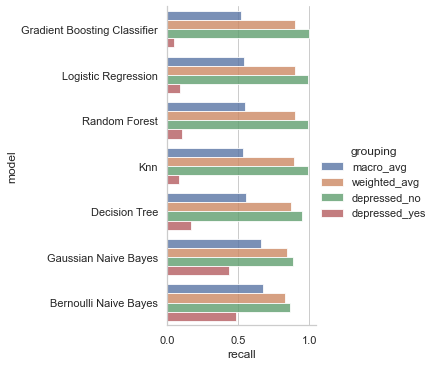

In [12]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

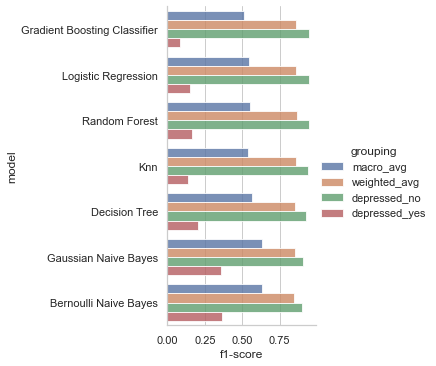

In [13]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='f1-score', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

We see low recall among the depressed_yes group (positive class). This will be the emphasis on future model enhancements.

## Error Analysis

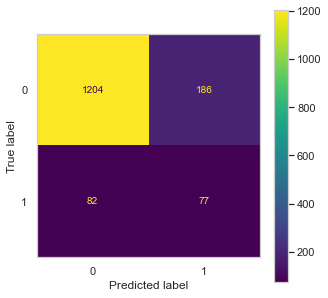

In [14]:
plot_confusion_matrix(
    y_test = predictions['actuals'], 
    pred_labels = predictions['pred_bernoulli_naive_bayes']
)

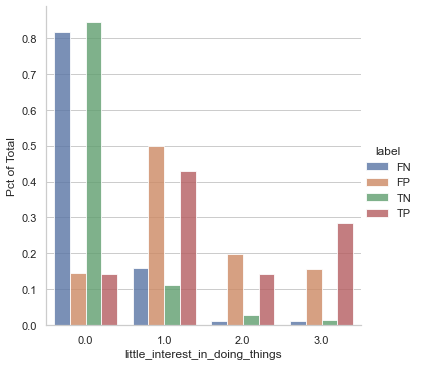

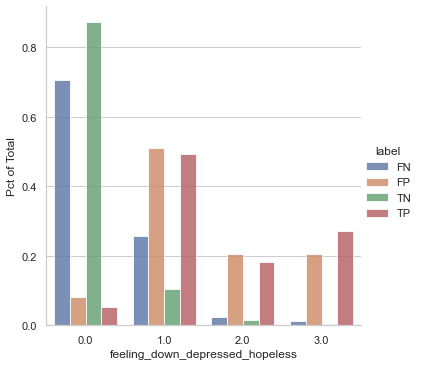

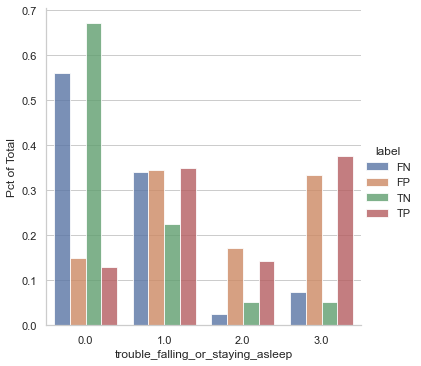

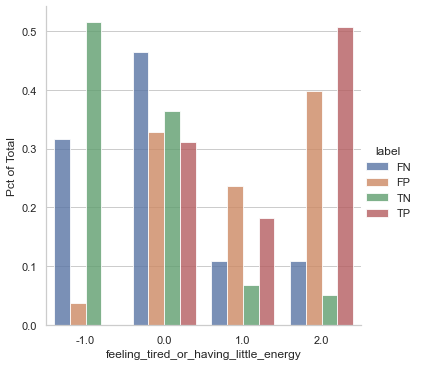

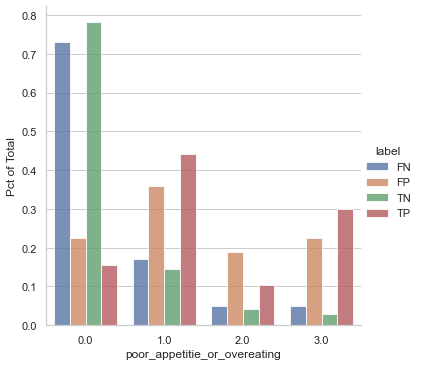

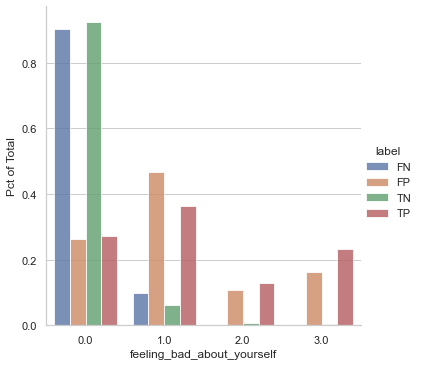

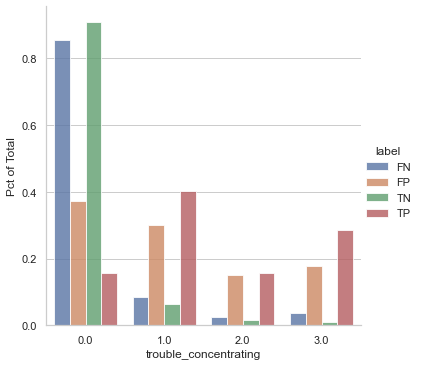

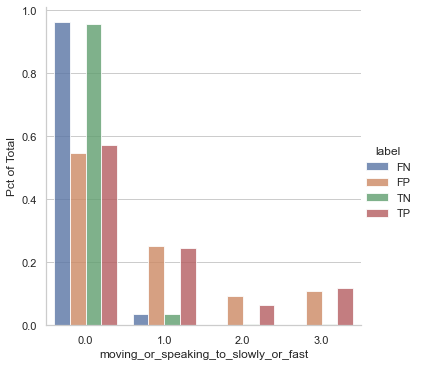

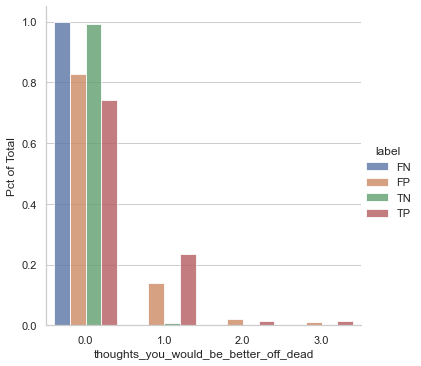

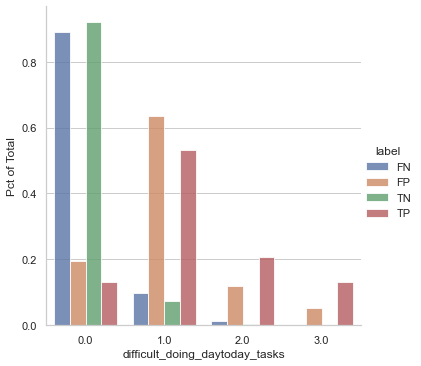

In [15]:
pred_data = create_error_plots(
    y_actuals = predictions['actuals'],
    y_predictions = predictions['pred_bernoulli_naive_bayes'],
    x_test_matrix = x_test,
    x_test_columns = dep_screener_cols,
    columns_to_plot = dep_screener_cols,
    show_density_plot=False
)

#### Feature distribution across labels

Find the next several best features to add based on ones where initially strong features have a false read. I.E individual is depressed but imporant column has low value.

In [16]:
# stats by prediction label & combine feature importance

# aggregate features by label
pred_data_summary = pred_data.groupby(['label']).mean().round(2).reset_index()

# order columns 
pred_data_summary['label'] = pd.Categorical(
    pred_data_summary['label'], 
    categories=["TP","FP","TN","FN"],
    ordered=True
)
pred_data_summary.sort_values('label', inplace=True)

# transpose so each row is a feature
pred_data_summary = pred_data_summary.T.reset_index()

# merge importances
rf_feature_importances = get_random_forest_n_top_features()
pred_data_summary = pred_data_summary.merge(rf_feature_importances, left_on='index', right_on='Feature', how = 'left')

# drop duplicate column
pred_data_summary.drop(columns='Feature', inplace=True)

## remove unneeded rows
pred_data_summary = pred_data_summary[~pred_data_summary['index'].isin(['y_actual','y_pred'])]

# order by feature importance
pred_data_summary = pred_data_summary.sort_values(by='Feature Importance (RF)',ascending=False)
pred_data_summary = pred_data_summary.rename(columns={"index": "Feature", 
                                  3: "TP",
                                  1:"FP",
                                  2:"TN",
                                  0:"FN"})

pred_data_summary

Feature    TP    FP    TN    FN  \
4         feeling_down_depressed_hopeless  1.68  1.53  0.15  0.34   
7            poor_appetitie_or_overeating  1.55  1.41  0.32  0.41   
5       trouble_falling_or_staying_asleep  1.77  1.69  0.48  0.61   
9                   trouble_concentrating  1.57  1.13  0.13  0.24   
12         difficult_doing_daytoday_tasks  1.34  1.03  0.08  0.12   
3         little_interest_in_doing_things  1.57  1.37  0.21  0.22   
6   feeling_tired_or_having_little_energy  1.19  0.99 -0.34  0.01   
8              feeling_bad_about_yourself  1.32  1.17  0.09   0.1   
10   moving_or_speaking_to_slowly_or_fast  0.73  0.76  0.06  0.04   
11  thoughts_you_would_be_better_off_dead   0.3  0.22  0.01   0.0   
0                                   label    TP    FP    TN    FN   

    Feature Importance (RF)  
4                  0.116370  
7                  0.116036  
5                  0.113776  
9                  0.107036  
12                 0.105663  
3                  0.105246  
6                  0.104398  
8                  0.099671  
10                 0.088079  
11                 0.043725  
0                       NaN

#### Compare all features (including those not in model)

In [17]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = candidate_features
)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions, performance_train = generate_models(
    x_train[:,:10], 
    y_train, 
    x_test[:,:10], 
    y_test
)

baseline_model_summary = baseline_model[baseline_model['grouping'] == 'macro_avg']
baseline_model_summary[['model','recall','f1-score','precision','accuracy','support']]

(6192, 117)
(1549, 117)
(6192,)
(1549,)


model    recall  f1-score  precision  accuracy  \
2         Bernoulli Naive Bayes  0.675232  0.632390   0.614506  0.826985   
2          Gaussian Naive Bayes  0.660506  0.633699   0.618641  0.840542   
2                 Decision Tree  0.559006  0.568736   0.590846  0.868302   
2                 Random Forest  0.543840  0.555191   0.688099  0.896062   
2           Logistic Regression  0.538270  0.546401   0.685605  0.896062   
2                           Knn  0.534046  0.539683   0.655004  0.893480   
2  Gradient Boosting Classifier  0.519854  0.513698   0.719752  0.897999   

   support  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0  
2   1549.0

In [18]:
pred_data = create_error_plots(
    y_actuals = predictions['actuals'],
    y_predictions = predictions['pred_bernoulli_naive_bayes'],
    x_test_matrix = x_test,
    x_test_columns = candidate_features,
    columns_to_plot = candidate_features,
    show_density_plot=False,
    show_bar_plot=False
)

In [19]:
# stats by prediction label & combine feature importance

# aggregate features by label
pred_data_summary = pred_data.groupby(['label']).mean().round(2).reset_index()

# order columns 
pred_data_summary['label'] = pd.Categorical(
    pred_data_summary['label'], 
    categories=["TP","FP","TN","FN"],
    ordered=True
)
pred_data_summary.sort_values('label', inplace=True)

# transpose so each row is a feature
pred_data_summary = pred_data_summary.T.reset_index()

## remove unneeded rows
pred_data_summary = pred_data_summary[~pred_data_summary['index'].isin(['y_actual','y_pred','label'])]
pred_data_summary = pred_data_summary.rename(columns={"index": "Feature", 
                                  3: "TP",
                                  1:"FP",
                                  2:"TN",
                                  0:"FN"})
pred_data_summary = pred_data_summary[pred_data_summary['TP'] != 0]
pred_data_summary['TP_minus_FN_abs'] = abs((pred_data_summary['TP'] - pred_data_summary['FN']) / pred_data_summary['TP'])

In [20]:
pd.set_option('display.max_rows', 1000)
#pd.reset_option('^display.', silent=True)


pred_data_summary[~pred_data_summary['Feature'].isin(dep_screener_cols)].sort_values(by = 'TP_minus_FN_abs', ascending=False)

Feature    TP    FP    TN    FN  \
108                            months_since_birth -0.05  0.31  0.11  0.17   
91                           family_poverty_level  0.12  0.24  0.75  0.61   
113                         monthly_poverty_index  0.12  0.24  0.75  0.61   
106                            age_at_first_birth  0.03  0.15  0.32  0.12   
115                                  age_in_years -0.11 -0.11 -0.02  0.15   
48                         currently_reducing_fat  0.06   0.2  0.16   0.2   
75      count_minutes_moderate_sedentary_activity  0.14  0.28  0.17  0.43   
64                     time_since_last_healthcare  0.01  0.01  0.01 -0.01   
112                monthly_poverty_index_category -0.08 -0.09  0.07  0.08   
68                 duration_last_healthcare_visit  0.01  0.01  0.01 -0.01   
92                  family_poverty_level_category -0.08 -0.09  0.07  0.08   
17                                    alc_per_day  0.38  0.18  -0.1 -0.22   
16                              alc_drinking_freq  -0.4 -0.58 -0.24  0.07   
14                     alcoholic_drinks_past_12mo  -0.4 -0.58 -0.24  0.07   
62                                 general_health  0.27  0.19 -0.15 -0.04   
61                       general_health_condition  0.27  0.19 -0.15 -0.04   
74   count_minutes_moderate_recreational_activity  7.53  1.32  2.95 -0.98   
58                                      height_in -0.24 -0.02 -0.14  0.01   
102                               pregnancy_count  0.25   0.4   0.2 -0.01   
63                       regular_healthcare_place  0.06  0.16  0.11   0.0   
90                       plan_cover_prescriptions  0.05  0.04  0.05   0.1   
34                                         stroke -0.06 -0.08 -0.04 -0.12   
101                                  pregnant_now -0.01 -0.03 -0.02 -0.02   
19                           times_with_8plus_alc  0.35  0.27  0.15   0.0   
52                               age_hypertension -3.51 -1.22 -0.28 -0.27   
79                       how_healthy_is_your_diet  0.25  0.17 -0.01  0.04   
100                              pelvic_infection -0.06  -0.1 -0.03 -0.01   
67                    count_days_seen_doctor_12mo  0.71  0.21 -0.04  0.12   
109                              horomones_not_bc -0.18 -0.17 -0.17 -0.32   
32                                angina_pectoris -0.09 -0.03 -0.02 -0.02   
53                      hypertension_prescription  0.09  0.06  0.03  0.02   
15                                      drank_alc  0.04  0.02  0.08  0.01   
80                          milk_consumption_freq -0.12 -0.11 -0.17 -0.21   
107                             age_at_last_birth -0.15 -0.11  -0.0 -0.04   
76                       count_lost_10plus_pounds  0.39  0.35   0.3  0.66   
54                           high_bp_prescription  0.03  0.06  0.05  0.05   
86                        emergency_food_received -0.34 -0.22 -0.09 -0.13   
45                        currently_losing_weight   0.1  0.18  0.15  0.16   
40                                         cancer  -0.1 -0.11 -0.12 -0.16   
47                        currently_reducing_salt  0.14  0.19  0.17  0.22   
119                      has_health_insurance_gap  0.09  0.09  0.05  0.04   
22                     days_4plus_drinks_occasion  0.56  0.48  0.17  0.26   
13                  has_smoked_tabacco_last_5days  0.44  0.31  0.14  0.22   
36                             respiratory_issues -0.06 -0.06 -0.03 -0.09   
38                                     gallstones -0.06 -0.11 -0.05 -0.09   
21                                4plus_alc_daily -0.19 -0.15 -0.06  -0.1   
24                                currently_smoke -0.74 -0.52 -0.22 -0.39   
111                     food_security_level_adult  1.25  1.01  0.57  0.67   
110                 food_security_level_household  1.26  1.02  0.57  0.71   
66                seen_mental_health_professional -0.49 -0.17 -0.05 -0.28   
49                                  metal_objects -0.17 -0.13 -0.14 -0.24   
41                       dr_recommend_

## Find different theme base permutations


summarize all other potential features

In [21]:
# calculate % values null by feature

null_value_tot = pd.DataFrame(
    cdc_survey_pmom[candidate_features].isna().sum())\
    .rename(columns={0:'num_nulls'}
).reset_index()
null_value_tot = null_value_tot.sort_values(by = 'num_nulls',ascending=False)
null_value_tot['pct_null'] = null_value_tot['num_nulls'] / cdc_survey_pmom.shape[0]
null_value_tot.rename(columns={'index':'feature'},inplace=True)



# calculate summary stats for each feature 
def univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns = dep_screener_cols,
    target_col = 'MDD'):
    
    column_values = pd.DataFrame(columns = ['col_value','pct_target','num_responses','feature'])
    column_summary = pd.DataFrame(columns=['feature','corr','corr_abs','std_mdd_pct','min_mdd_pct','max_mdd_pct','unique_values','target','max_minus_min'])

    # MDD coverage by feature
    for col in columns:

        # calc mean pct for target column by indicator variable
        univariate = df_to_use.groupby(col) \
               .agg({target_col:'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value',target_col:'pct_target','SEQN':'num_responses'})

       # print(f"\n{col}\n")
       # print(univariate)
        
        # aggregate into summary table
        column_traits = pd.DataFrame({
            'feature':[col],
            'corr':[cdc_survey_pmom[['MDD',col]].corr().iloc[1,0]],
            'corr_abs':[abs(cdc_survey_pmom[['MDD',col]].corr().iloc[1,0])],            
            'std_mdd_pct':[univariate[univariate['num_responses'] >= 30]['pct_target'].std()],
            'min_mdd_pct':[univariate[univariate['num_responses'] >= 30]['pct_target'].min()],
            'max_mdd_pct':[univariate[univariate['num_responses'] >= 30]['pct_target'].max()],
            'unique_values':[univariate[univariate['num_responses'] >= 30].shape[0]],
            'target':[target_col]
        })
        column_traits['max_minus_min'] = column_traits['max_mdd_pct'] - column_traits['min_mdd_pct']
        column_summary = pd.concat([column_summary,column_traits])
        
        # univariate data
        univariate['feature'] = col
        column_values = pd.concat([column_values,univariate])
        
    return column_summary, column_values
        
univariate_stats, univariate_values = univariate_analysis(columns=candidate_features)

# merge together 
univariate_summary = univariate_stats.merge(null_value_tot, left_on='feature', right_on='feature', how = 'left')


# define theme
def create_theme_col(value):
    if value in dep_screener_cols:
        return 'dep_screener'
    elif value in alcohol_n_smoking_cols:
        return 'alcohol_n_smoking'
    elif value in med_condition_cols:
        return 'med_condition'
    elif value in lifestyle_cols:
        return 'lifestyle'
    elif value in hospital_utilization_n_access_cols:
        return 'hospital_utilization_n_access'
    elif value in socioeconomic_cols:
        return 'socioeconomic'
    elif value in reproductive_health_cols:
        return 'reproductive_health'
    elif value in demographic_cols:
        return 'demographic'    
    
univariate_summary['feature_theme'] = univariate_summary['feature'].map(create_theme_col)    
univariate_summary = univariate_summary.sort_values(by = 'max_minus_min', ascending=False)
univariate_summary

feature      corr  corr_abs  \
9                  difficult_doing_daytoday_tasks  0.251297  0.251297   
1                 feeling_down_depressed_hopeless  0.266087  0.266087   
63                seen_mental_health_professional -0.281615  0.281615   
49                               age_hypertension -0.043941  0.043941   
8           thoughts_you_would_be_better_off_dead  0.123574  0.123574   
5                      feeling_bad_about_yourself  0.220417  0.220417   
6                           trouble_concentrating  0.203917  0.203917   
3           feeling_tired_or_having_little_energy  0.225408  0.225408   
0                 little_interest_in_doing_things  0.197702  0.197702   
4                    poor_appetitie_or_overeating  0.184182  0.184182   
81                               readytoeat_meals  0.024879  0.024879   
7            moving_or_speaking_to_slowly_or_fast  0.144270  0.144270   
57                weight_lbs_over_height_in_ratio  0.094843  0.094843   
56                                     weight_lbs  0.094245  0.094245   
64                    count_days_seen_doctor_12mo  0.171175  0.171175   
82                                   frozen_pizza  0.079178  0.079178   
59                                 general_health  0.135315  0.135315   
58                       general_health_condition  0.135315  0.135315   
94                                age_last_period -0.075339  0.075339   
60                       regular_healthcare_place -0.063922  0.063922   
112                                  age_in_years  0.080434  0.080434   
2               trouble_falling_or_staying_asleep  0.174241  0.174241   
111                  count_hours_worked_last_week -0.035345  0.035345   
90                                   hours_worked -0.035564  0.035564   
19                     days_4plus_drinks_occasion -0.001035  0.001035   
76                       how_healthy_is_your_diet  0.098902  0.098902   
99                                pregnancy_count  0.008215  0.008215   
11                     alcoholic_drinks_past_12mo -0.016936  0.016936   
13                              alc_drinking_freq -0.016936  0.016936   
28                         coronary_heart_disease -0.067706  0.067706   
55                                      height_in  0.011101  0.011101   
33                             respiratory_issues -0.114722  0.114722   
15                            times_with_4or5_alc -0.027666  0.027666   
30                                   heart_attack -0.066955  0.066955   
31                                         stroke -0.078595  0.078595   
73                       count_lost_10plus_pounds  0.112602  0.112602   
79                              nonhomemade_meals -0.012005  0.012005   
26                                      arthritis -0.162268  0.162268   
29                                angina_pectoris -0.051130  0.051130   
18                                4plus_alc_daily -0.091502  0.091502   
72      count_minutes_moderate_sedentary_activity  0.078043  0.078043   
22                               chest_discomfort -0.134263  0.134263   
107                 food_security_level_household  0.086664  0.086664   
108                     food_security_level_adult  0.084456  0.084456   
104                             age_at_last_birth -0.032485  0.032485   
103                            age_at_first_birth -0.046757  0.046757   
106                              horomones_not_bc -0.105222  0.105222   
83                        emergency_food_received -0.091506  0.091506   
34                                 abdominal_pain -0.104208  0.104208   
39                          dr_recommend_exercise -0.119847  0.119847   
78                           govmnt_meal_delivery -0.047075  0.047075   
68                            vigorous_recreation  0.088935  0.088935   
114                                   is_usa_born  0.108059  0.108059   
20                                smoked_100_cigs -0.113007  0.113007   
53                       ch

### Attempt 1

add new candidate cols with high correlation to target when dep screener is 0

In [22]:
cor_columns = candidate_features.copy()
cor_columns.append('MDD')

# find columns where top feature is 0
#df_to_use = cdc_survey_pmom[cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0]
df_to_use = cdc_survey_pmom[(cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0) & 
                (cdc_survey_pmom['poor_appetitie_or_overeating'] == 0) &
                (cdc_survey_pmom['trouble_falling_or_staying_asleep'] == 0)]

correlation_matrix = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs = abs(correlation_matrix['MDD']).sort_values(ascending=False)
correlation_values_abs = correlation_values_abs[correlation_values_abs.notna()]

In [23]:
top_additional_candidates = list(correlation_values_abs[1:30].index)
top_additional_candidates = [col for col in top_additional_candidates if col not in dep_screener_cols]
top_additional_candidates

['seen_mental_health_professional',
 'times_with_12plus_alc',
 'time_since_last_healthcare',
 'duration_last_healthcare_visit',
 'horomones_not_bc',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'respiratory_issues',
 'arthritis',
 'age_in_years',
 'is_usa_born',
 'regular_periods',
 'high_bp',
 'metal_objects',
 'count_minutes_moderate_sedentary_activity',
 'cholesterol_prescription',
 'chest_discomfort',
 'emergency_food_received',
 'high_cholesterol',
 'cancer',
 'months_since_birth',
 'regular_healthcare_place',
 'govmnt_meal_delivery',
 'over_35_hrs_worked',
 'vigorous_recreation',
 'pelvic_infection',
 'has_health_insurance',
 'have_health_insurance']

In [26]:
cor_columns = candidate_features.copy()
cor_columns.append('MDD')

cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)

# find columns where top feature is 0
#df_to_use = cdc_survey_pmom[cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0]
df_to_use = cdc_survey_pmom[cdc_survey_pmom['num_dep_screener_0'] >= 9]

correlation_matrix = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs = abs(correlation_matrix['MDD']).sort_values(ascending=False)
correlation_values_abs = correlation_values_abs[correlation_values_abs.notna()]

top_additional_candidates_v2 = list(correlation_values_abs[1:30].index)
top_additional_candidates_v2 = [col for col in top_additional_candidates_v2 if col not in dep_screener_cols]
top_additional_candidates_v2

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'duration_last_healthcare_visit',
 'time_since_last_healthcare',
 'work_schedule',
 'age_in_years',
 'regular_periods',
 'count_minutes_moderate_sedentary_activity',
 'emergency_food_received',
 'high_bp',
 'dr_recommend_exercise',
 'metal_objects',
 'drank_alc',
 'cholesterol_prescription',
 'smoked_100_cigs',
 'vigorous_recreation',
 'dr_recommend_lose_weight',
 'cancer',
 'chest_discomfort',
 'has_health_insurance',
 'have_health_insurance',
 'weight_lbs',
 'high_cholesterol']

In [584]:
#list(candidate_features_matrix.sort_values(by = 'corr_to_mdd_subset_data', ascending=False).iloc[:18,]['feature'])

summarize the new top features

In [416]:
Counter(univariate_summary[univariate_summary['feature'].isin(top_additional_candidates)]['feature_theme'])

Counter({'hospital_utilization_n_access': 4,
         'demographic': 2,
         'med_condition': 6,
         'lifestyle': 2,
         'reproductive_health': 2,
         'socioeconomic': 1,
         'alcohol_n_smoking': 1})

In [417]:
#univariate_summary[univariate_summary['feature_theme'] == "socioeconomic"]
univariate_summary[univariate_summary['feature'].isin(top_additional_candidates)]

feature      corr  corr_abs  \
63   seen_mental_health_professional           -0.281615  0.281615   
64   count_days_seen_doctor_12mo                0.171175  0.171175   
112  age_in_years                               0.080434  0.080434   
33   respiratory_issues                        -0.114722  0.114722   
73   count_lost_10plus_pounds                   0.112602  0.112602   
26   arthritis                                 -0.162268  0.162268   
72   count_minutes_moderate_sedentary_activity  0.078043  0.078043   
22   chest_discomfort                          -0.134263  0.134263   
106  horomones_not_bc                          -0.105222  0.105222   
83   emergency_food_received                   -0.091506  0.091506   
114  is_usa_born                                0.108059  0.108059   
53   cholesterol_prescription                  -0.106668  0.106668   
48   high_bp                                   -0.101801  0.101801   
93   regular_periods                            0.093772  0.093772   
46   metal_objects                             -0.068000  0.068000   
65   duration_last_healthcare_visit            -0.077180  0.077180   
61   time_since_last_healthcare                -0.077180  0.077180   
17   times_with_12plus_alc                     -0.164896  0.164896   

     std_mdd_pct  min_mdd_pct  max_mdd_pct unique_values target  \
63   0.197384     0.069421     0.348564     2             MDD     
64   0.065676     0.098901     0.276596     6             MDD     
112  0.039757     0.000000     0.153226     61            MDD     
33   0.080711     0.090403     0.204545     2             MDD     
73   0.056561     0.091178     0.195513     4             MDD     
26   0.070871     0.061262     0.161488     2             MDD     
72   0.031585     0.066667     0.162162     15            MDD     
22   0.066257     0.085303     0.179005     2             MDD     
106  0.056564     0.082017     0.162011     2             MDD     
83   0.056385     0.087752     0.167493     2             MDD     
114  0.049407     0.048297     0.118168     2             MDD     
53   0.048734     0.081376     0.150297     2             MDD     
48   0.043247     0.071698     0.132858     2             MDD     
93   0.040054     0.063303     0.119948     2             MDD     
46   0.034606     0.101695     0.150635     2             MDD     
65   0.017205     0.000000     0.040541     4             MDD     
61   0.017205     0.000000     0.040541     4             MDD     
17  NaN           0.150000     0.150000     1             MDD     

     max_minus_min  num_nulls  pct_null                  feature_theme  
63   0.279143       3          0.000388  hospital_utilization_n_access  
64   0.177695       6858       0.885932  hospital_utilization_n_access  
112  0.153226       0          0.000000  demographic                    
33   0.114143       4336       0.560134  med_condition                  
73   0.104335       4430       0.572277  lifestyle                      
26   0.100227       27         0.003488  med_condition                  
72   0.095495       2254       0.291177  lifestyle                      
22   0.093701       1990       0.257073  med_condition                  
106  0.079994       42         0.005426  reproductive_health            
83   0.079741       282        0.036429  socioeconomic                  
114  0.069872       6          0.000775  demographic                    
53   0.068921       1337       0.172717  med_condition                  
48   0.061160       7          0.000904  med_condition                  
93   0.056645       2          0.000258  reproductive_health            
46   0.048940       3630       0.468932  med_condition                  
65   0.040541       7406       0.956724  hospital_utilization_n_access  
61   0.040541       7406       0.956724  hospital_utilization_n_access  
17   0.000000       7582       0.979460  alcohol_n_smoking

In [59]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + top_additional_candidates
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model_attempt1, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary_attempt1 = baseline_model_attempt1[baseline_model_attempt1['grouping'] == 'macro_avg']
baseline_model_summary_attempt1[['model','recall','f1-score','precision','accuracy']]

(6192, 39)
(1549, 39)
(6192,)
(1549,)


model    recall  f1-score  precision  accuracy
2          Gaussian Naive Bayes  0.718596  0.620372   0.607619  0.779858
2         Bernoulli Naive Bayes  0.681254  0.639685   0.621021  0.832795
2                 Decision Tree  0.618558  0.612763   0.607898  0.850226
2  Gradient Boosting Classifier  0.572142  0.597519   0.746209  0.901872
2           Logistic Regression  0.572049  0.594921   0.700831  0.896708
2                 Random Forest  0.544652  0.556990   0.793758  0.902518
2                           Knn  0.542401  0.552780   0.663207  0.893480

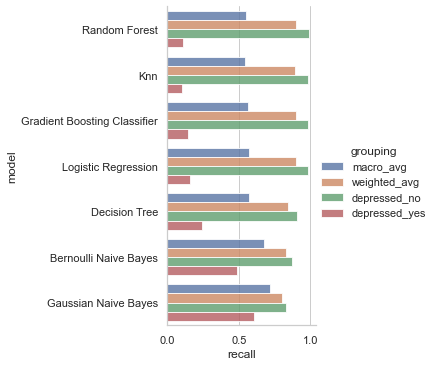

In [266]:
sns.catplot(
    data=baseline_model_attempt1, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

### Attempt 2

Add in bin of num dep

In [60]:
cdc_survey_pmom['num_dep_screener_3'] = (cdc_survey_pmom[dep_screener_cols]>=3).sum(axis=1)
cdc_survey_pmom['num_dep_screener_3_bin'] = pd.cut(
    cdc_survey_pmom['num_dep_screener_3'], 
    bins=[-np.inf, 0, 1, 3, np.inf], 
    labels=[0, 1, 2 ,3]
)

In [153]:
cdc_survey_pmom.groupby('num_dep_screener_3')['MDD'].mean()

num_dep_screener_3
0     0.065739
1     0.119420
2     0.248744
3     0.251337
4     0.305785
5     0.380282
6     0.400000
7     0.484848
8     0.250000
9     0.444444
10    0.500000
Name: MDD, dtype: float64

In [157]:
cdc_survey_pmom.groupby('num_dep_screener_3_bin')['MDD'].mean()

num_dep_screener_3_bin
0    0.065739
1    0.119420
2    0.249573
3    0.360269
Name: MDD, dtype: float64

In [158]:
cdc_survey_pmom.groupby('num_dep_screener_3_bin')['num_dep_screener_3'].max()

num_dep_screener_3_bin
0     0
1     1
2     3
3    10
Name: num_dep_screener_3, dtype: int64

In [61]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_3_bin']
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model_attempt2, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary_attmept2 = baseline_model_attempt2[baseline_model_attempt2['grouping'] == 'macro_avg']
baseline_model_summary_attmept2[['model','recall','f1-score','precision','accuracy']]

(6192, 40)
(1549, 40)
(6192,)
(1549,)


model    recall  f1-score  precision  accuracy
2          Gaussian Naive Bayes  0.719861  0.629071   0.612868  0.792124
2         Bernoulli Naive Bayes  0.683227  0.636087   0.617265  0.826340
2                 Decision Tree  0.587564  0.588297   0.589056  0.849580
2           Logistic Regression  0.572408  0.595686   0.705578  0.897353
2  Gradient Boosting Classifier  0.568637  0.592223   0.734249  0.900581
2                 Random Forest  0.544652  0.556990   0.793758  0.902518
2                           Knn  0.544107  0.555153   0.650530  0.891543

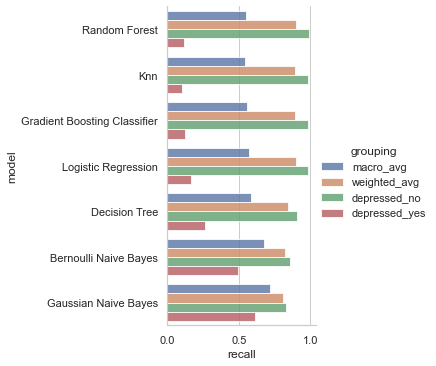

In [268]:
sns.catplot(
    data=baseline_model_attempt2, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

### Attempt 3

Try systematically adding in based on theme

- try variables by theme separately to see how well they do in comparison
- try depression cols + top X by theme 
 - Top x found by either; 1) highest corr to target or 2) high corr to target when depression screener is 0

In [62]:
stat_cols = ['corr_abs','min_mdd_pct','max_mdd_pct','max_minus_min','pct_null']

def create_summary(aggregation_method = 'mean'):

    summary_by_theme = univariate_summary.groupby(['feature_theme'])[stat_cols] \
        .agg(aggregation_method) \
        .reset_index() 

    summary_by_theme['num_features'] = list(univariate_summary.groupby(['feature_theme'])['feature'].count())
    return summary_by_theme.sort_values(by = 'corr_abs', ascending=False)

create_summary(aggregation_method = 'mean')

feature_theme  corr_abs  min_mdd_pct  max_mdd_pct  \
2                   dep_screener  0.199110     0.065171     0.302117   
3  hospital_utilization_n_access  0.123418     0.047363     0.178669   
5                  med_condition  0.069241     0.081455     0.157108   
0              alcohol_n_smoking  0.054075     0.076371     0.150898   
1                    demographic  0.053226     0.062404     0.133207   
7                  socioeconomic  0.047924     0.069926     0.115137   
4                      lifestyle  0.043028     0.071992     0.145151   
6            reproductive_health  0.038071     0.061459     0.120253   

   max_minus_min  pct_null  num_features  
2       0.236946  0.034918            10  
3       0.131306  0.400188             7  
5       0.075653  0.258431            37  
0       0.074528  0.526461            12  
1       0.070803  0.100026            10  
7       0.045211  0.341222            10  
4       0.073159  0.272263            17  
6       0.058794  0.306097            14

In [63]:
themes = [
    'dep_screener',
    'hospital_utilization_n_access',
    'alcohol_n_smoking',
    'reproductive_health',
    'med_condition',
    'lifestyle',
    'demographic',
    'socioeconomic'
]

In [64]:
def create_alt_plot_theme(dataset, x_col, x_name, y_col, y_name):
    chart = alt.Chart(dataset).mark_bar().encode(
        x = alt.X(x_col, title=x_name, axis=alt.Axis(labelAngle=-45)),
        y = alt.Y(y_col, title=y_name, scale=alt.Scale(domain=[0, 1])),
        color='theme:N',
    ).facet(
        facet=alt.Facet('model')
    )
    
    return chart

### Model by feature theme

In [65]:
perf_by_theme = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])


for theme in themes:
    feature_columns = list(univariate_summary[univariate_summary['feature_theme'] == theme]['feature'])
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = feature_columns
    )

    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    baseline_model['theme'] = theme
    perf_by_theme = pd.concat([perf_by_theme, baseline_model])

In [66]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'macro_avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'recall',
    y_name = 'recall'
)

by_theme

alt.FacetChart(...)

In [67]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'macro_avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'f1-score',
    y_name = 'f1-score'
)

by_theme

alt.FacetChart(...)

In [68]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'depressed_yes'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'recall',
    y_name = 'recall'
)

by_theme

alt.FacetChart(...)

In [69]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'depressed_yes'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'f1-score',
    y_name = 'f1-score'
)

by_theme

alt.FacetChart(...)

#### Model by dep screener + 10 columns for a feature theme

In [70]:
# sorted features based on correlation to MDD where dep is = 0
cor_columns = candidate_features.copy()
cor_columns.append('MDD')

# find columns where top feature is 0
#df_to_use = cdc_survey_pmom[cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0]
df_to_use = cdc_survey_pmom[(cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0) & 
                (cdc_survey_pmom['poor_appetitie_or_overeating'] == 0) &
                (cdc_survey_pmom['trouble_falling_or_staying_asleep'] == 0)]

correlation_matrix = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs = abs(correlation_matrix['MDD']).sort_values(ascending=False)
correlation_values_abs = correlation_values_abs[correlation_values_abs.notna()]

perf_by_theme_inc = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])

for theme in themes[1:]:
    # get all features within a theme
    print(theme)
    theme_features = list(univariate_summary[univariate_summary['feature_theme'] == theme]['feature'])

    # find top 20 features for that theme
    top_additional_candidates = list(correlation_values_abs[correlation_values_abs.index.isin(theme_features)][:10].index)
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = dep_screener_cols + top_additional_candidates
    )


    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    baseline_model['theme'] = theme
    perf_by_theme_inc = pd.concat([perf_by_theme_inc, baseline_model])
    
# add in baseline to give context to incr benefit
perf_by_theme_inc = pd.concat([perf_by_theme_inc, perf_by_theme[(perf_by_theme['theme'] == "dep_screener")]])


# define description
def create_theme_col_desc(value):
    if value in 'dep_screener':
        return 'Baseline (dep_screener only)'
    elif value in 'alcohol_n_smoking':
        return '+ alcohol_n_smoking'
    elif value in 'med_condition':
        return '+ med_condition'
    elif value in 'lifestyle':
        return '+ lifestyle'
    elif value in 'hospital_utilization_n_access':
        return '+ hospital_utilization_n_access'
    elif value in 'socioeconomic':
        return '+ socioeconomic'
    elif value in 'reproductive_health':
        return '+ reproductive_health'
    elif value in 'demographic':
        return '+ demographic' 

perf_by_theme_inc['theme_desc'] = perf_by_theme_inc['theme'].map(create_theme_col_desc)

hospital_utilization_n_access
alcohol_n_smoking
reproductive_health
med_condition
lifestyle
demographic
socioeconomic


In [231]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'macro_avg'],
    x_col = 'theme_desc',
    x_name = 'theme',
    y_col = 'recall',
    y_name = 'recall'
)

by_theme

alt.FacetChart(...)

In [240]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'macro_avg'],
    x_col = 'theme_desc',
    x_name = 'theme',
    y_col = 'f1-score',
    y_name = 'f1-score'
)

by_theme

alt.FacetChart(...)

In [239]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'depressed_yes'],
    x_col = 'theme_desc',
    x_name = 'theme',
    y_col = 'recall',
    y_name = 'recall'
)

by_theme

alt.FacetChart(...)

In [238]:
by_theme = create_alt_plot_theme(
    dataset = perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'depressed_yes'],
    x_col = 'theme_desc',
    x_name = 'theme',
    y_col = 'f1-score',
    y_name = 'f1-score'
)

by_theme

alt.FacetChart(...)

In [97]:
cor_columns = candidate_features.copy()
cor_columns.append('MDD')

cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)

# find columns where top feature is 0
#df_to_use = cdc_survey_pmom[cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0]
df_to_use = cdc_survey_pmom[cdc_survey_pmom['num_dep_screener_0'] >= 9]

correlation_matrix = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs = abs(correlation_matrix['MDD']).sort_values(ascending=False)
correlation_values_abs = correlation_values_abs[correlation_values_abs.notna()]

top_additional_candidates_v2 = list(correlation_values_abs[1:30].index)
top_additional_candidates_v2 = [col for col in top_additional_candidates_v2 if col not in dep_screener_cols]
top_additional_candidates_v2 = top_additional_candidates_v2[:28]
top_additional_candidates_v2

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'duration_last_healthcare_visit',
 'time_since_last_healthcare',
 'work_schedule',
 'age_in_years',
 'regular_periods',
 'count_minutes_moderate_sedentary_activity',
 'emergency_food_received',
 'high_bp',
 'dr_recommend_exercise',
 'metal_objects',
 'drank_alc',
 'cholesterol_prescription',
 'smoked_100_cigs',
 'vigorous_recreation',
 'dr_recommend_lose_weight',
 'cancer',
 'chest_discomfort',
 'has_health_insurance',
 'have_health_insurance',
 'weight_lbs']

28

In [91]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + top_additional_candidates_v2
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model_attempt3, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

#baseline_model_summary_attempt3 = baseline_model_attempt3[baseline_model_attempt3['grouping'] == 'macro_avg']
#baseline_model_summary_attempt3[['model','recall','f1-score','precision','accuracy']]

(6192, 38)
(1549, 38)
(6192,)
(1549,)


In [81]:
baseline_model_attempt3[baseline_model_attempt3['grouping'] == 'depressed_yes']

model       grouping  precision    recall  f1-score  \
1  Gaussian Naive Bayes          depressed_yes  0.267532   0.647799  0.378676   
1  Bernoulli Naive Bayes         depressed_yes  0.303502   0.490566  0.375000   
1  Decision Tree                 depressed_yes  0.269737   0.257862  0.263666   
1  Logistic Regression           depressed_yes  0.480769   0.157233  0.236967   
1  Gradient Boosting Classifier  depressed_yes  0.545455   0.150943  0.236453   
1  Knn                           depressed_yes  0.432432   0.100629  0.163265   
1  Random Forest                 depressed_yes  0.681818   0.094340  0.165746   

   support  accuracy  
1  159.0    0.781795  
1  159.0    0.832150  
1  159.0    0.852163  
1  159.0    0.896062  
1  159.0    0.899935  
1  159.0    0.894125  
1  159.0    0.902518

### Summarize changes

In [92]:
# add in performance from prior 2 attempts

baseline_model_attempt1['theme_desc'] = '+ top 20 features across any theme'
baseline_model_attempt1['theme'] = '+ top 20 features across any theme'
baseline_model_attempt2['theme'] = '+ top 20 features across any theme & dep screener bin'
baseline_model_attempt2['theme_desc'] = '+ top 20 features across any theme & dep screener bin'
baseline_model_attempt3['theme'] = '+ top 28 features across any theme (V2)'
baseline_model_attempt3['theme_desc'] = '+ top 28 features across any theme (V2)'

model_change_summary = pd.concat([
    perf_by_theme_inc, 
    baseline_model_attempt1, 
    baseline_model_attempt2, 
    baseline_model_attempt3
])

In [93]:
pd.set_option('display.max_colwidth', 0)

model_change_summary[model_change_summary['grouping'] == 'macro_avg'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})

model features  \
5   + reproductive_health                                   
0   + alcohol_n_smoking                                     
3   + lifestyle                                             
6   + socioeconomic                                         
10  Baseline (dep_screener only)                            
4   + med_condition                                         
1   + demographic                                           
2   + hospital_utilization_n_access                         
7   + top 20 features across any theme                      
8   + top 20 features across any theme & dep screener bin   
9   + top 28 features across any theme (V2)                 

               best_model    recall  f1-score  precision  
5   Bernoulli Naive Bayes  0.665705  0.622558  0.606051   
0   Bernoulli Naive Bayes  0.669210  0.625264  0.608294   
3   Bernoulli Naive Bayes  0.670648  0.627757  0.610511   
6   Bernoulli Naive Bayes  0.674872  0.631753  0.613927   
10  Bernoulli Naive Bayes  0.675232  0.632390  0.614506   
4   Gaussian Naive Bayes   0.679908  0.640849  0.622437   
1   Bernoulli Naive Bayes  0.680442  0.634656  0.616162   
2   Gaussian Naive Bayes   0.698220  0.630754  0.612437   
7   Gaussian Naive Bayes   0.718596  0.620372  0.607619   
8   Gaussian Naive Bayes   0.719861  0.629071  0.612868   
9   Gaussian Naive Bayes   0.722461  0.623168  0.609711

In [94]:
pd.set_option('display.max_colwidth', 0)

model_change_summary[model_change_summary['grouping'] == 'depressed_yes'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})

model features  \
5   + reproductive_health                                   
0   + alcohol_n_smoking                                     
3   + lifestyle                                             
4   + med_condition                                         
6   + socioeconomic                                         
10  Baseline (dep_screener only)                            
1   + demographic                                           
2   + hospital_utilization_n_access                         
8   + top 20 features across any theme & dep screener bin   
7   + top 20 features across any theme                      
9   + top 28 features across any theme (V2)                 

               best_model    recall  f1-score  precision  
5   Bernoulli Naive Bayes  0.471698  0.349650  0.277778   
0   Bernoulli Naive Bayes  0.477987  0.354312  0.281481   
3   Bernoulli Naive Bayes  0.477987  0.357647  0.285714   
4   Gaussian Naive Bayes   0.484277  0.376528  0.308000   
6   Bernoulli Naive Bayes  0.484277  0.364066  0.291667   
10  Bernoulli Naive Bayes  0.484277  0.364929  0.292776   
1   Bernoulli Naive Bayes  0.496855  0.370023  0.294776   
2   Gaussian Naive Bayes   0.559748  0.374737  0.281646   
8   Gaussian Naive Bayes   0.628931  0.383142  0.275482   
7   Gaussian Naive Bayes   0.641509  0.374312  0.264249   
9   Gaussian Naive Bayes   0.647799  0.378676  0.267532

In [237]:
perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'depressed_yes'][['model','recall','f1-score','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall')

theme_desc                  model    recall  f1-score
5            + reproductive_health  Bernoulli Naive Bayes  0.471698  0.349650
0              + alcohol_n_smoking  Bernoulli Naive Bayes  0.477987  0.354312
3                      + lifestyle  Bernoulli Naive Bayes  0.477987  0.357647
4                  + med_condition   Gaussian Naive Bayes  0.484277  0.376528
6                  + socioeconomic  Bernoulli Naive Bayes  0.484277  0.364066
7     Baseline (dep_screener only)  Bernoulli Naive Bayes  0.484277  0.364929
1                    + demographic  Bernoulli Naive Bayes  0.496855  0.370023
2  + hospital_utilization_n_access   Gaussian Naive Bayes  0.559748  0.374737

Learnings

- Dep screener is the best single theme
- Hospital utilization & med conditions are the 2nd & 3rd best supplemental features


Story Steps
- Baseline model does bad recall on depressed_yes class
- Dep screener is the best single theme
- Hospital utilization & med conditions are the 2nd & 3rd best supplemental themes. Can increase recall by about 3% (0.675 -> 0.698) with just **one** of these.
- Can increase recall by about 6.5% (0.675 -> 0.719) when adding top incremental features across **multiple** themes 

### Attempt 4

QA whether good to use all dep screeners 

In [381]:
perf_by_dep_n = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'num_cols'
])


for n in range(2,11,1):
    
    print(f"Doing {n}...")
    
    for i in range(30):
        columns_to_use = sample(dep_screener_cols,n)
        x_train, x_test, y_train, y_test = get_model_data(
            original_df = cdc_survey_pmom,
            columns = columns_to_use
        )

        baseline_model, predictions, performance_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        baseline_model['num_cols'] = n
        baseline_model['cols'] = str(['|'.join(columns_to_use)])

        perf_by_dep_n = pd.concat([perf_by_dep_n, baseline_model])

Doing 2...
Doing 3...
Doing 4...
Doing 5...
Doing 6...
Doing 7...
Doing 8...
Doing 9...
Doing 10...


In [383]:
dep_n_data = perf_by_dep_n[perf_by_dep_n['grouping'] == "depressed_yes"]


alt.Chart(dep_n_data).mark_point().encode(
    x = alt.X('num_cols', title="Number of Dep screenr cols"),
    y = alt.Y('recall', scale=alt.Scale(domain=[0, 1]))
).facet(
    facet=alt.Facet('model')
)

alt.FacetChart(...)

In [384]:
alt.Chart(dep_n_data).mark_point().encode(
    x = alt.X('num_cols', title="Number of Dep screenr cols"),
    y = alt.Y('f1-score', scale=alt.Scale(domain=[0, 1]))
).facet(
    facet=alt.Facet('model')
)

alt.FacetChart(...)

In [385]:
alt.Chart(dep_n_data).mark_point().encode(
    x = alt.X('num_cols', title="Number of Dep screenr cols"),
    y = alt.Y('precision', scale=alt.Scale(domain=[0, 1]))
).facet(
    facet=alt.Facet('model')
)

alt.FacetChart(...)

In [386]:
perf_by_dep_n = perf_by_dep_n.sort_values(by = 'recall', ascending=False)

perf_by_dep_n[
    (perf_by_dep_n['grouping'] == "depressed_yes")
    #(perf_by_dep_n['grouping'] == "macro_avg")
].groupby('model').first()

grouping  precision    recall  f1-score  \
model                                                                        
Bernoulli Naive Bayes         depressed_yes  0.290441   0.496855  0.366589   
Decision Tree                 depressed_yes  0.293578   0.201258  0.238806   
Gaussian Naive Bayes          depressed_yes  0.305310   0.433962  0.358442   
Gradient Boosting Classifier  depressed_yes  0.550000   0.069182  0.122905   
Knn                           depressed_yes  0.191489   0.283019  0.228426   
Logistic Regression           depressed_yes  0.533333   0.100629  0.169312   
Random Forest                 depressed_yes  0.468085   0.138365  0.213592   

                              support  accuracy  num_cols  \
model                                                       
Bernoulli Naive Bayes         159.0    0.823757  8          
Decision Tree                 159.0    0.868302  9          
Gaussian Naive Bayes          159.0    0.840542  10         
Gradient Boosting Classifier  159.0    0.898644  6          
Knn                           159.0    0.803744  2          
Logistic Regression           159.0    0.898644  7          
Random Forest                 159.0    0.895416  9          

                                                                                                                                                                                                                                                                                                                                                             cols  
model                                                                                                                                                                                                                                                                                                                                                              
Bernoulli Naive Bayes         ['feeling_bad_about_yourself|trouble_falling_or_staying_asleep|feeling_tired_or_having_little_energy|difficult_doing_daytoday_tasks|trouble_concentrating|feeling_down_depressed_hopeless|poor_appetitie_or_overeating|little_interest_in_doing_things']                                                                             
Decision Tree                 ['feeling_down_depressed_hopeless|trouble_falling_or_staying_asleep|moving_or_speaking_to_slowly_or_fast|difficult_doing_daytoday_tasks|feeling_tired_or_having_little_energy|trouble_concentrating|feeling_bad_about_yourself|little_interest_in_doing_things|poor_appetitie_or_overeating']                                        
Gaussian Naive Bayes          ['thoughts_you_would_be_better_off_dead|moving_or_speaking_to_slowly_or_fast|poor_appetitie_or_overeating|difficult_doing_daytoday_tasks|feeling_tired_or_having_little_energy|trouble_concentrating|feeling_bad_about_yourself|feeling_down_depressed_hopeless|little_interest_in_doing_things|trouble_falling_or_staying_asleep']  
Gradient Boosting Classifier  ['feeling_down_depressed_hopeless|little_interest_in_doing_things|thoughts_you_would_be_better_off_dead|feeling_tired_or_having_little_energy|difficult_doing_daytoday_tasks|trouble_concentrating']                                                                                                                                 
Knn                           ['difficult_doing_daytoday_tasks|moving_or_speaking_to_slowly_or_fast']                                                                                                                                                                                                                                                              
Logistic Regression           ['difficult_doing_daytoday_tasks|feeling_bad_about_yourself|thoughts_you_would_be_better_off_dead|trouble_concentrating|moving_or_speaking_to_slowly_or_fast|feeling_down_depressed_hopeless|little_interest_in_doing_things']                                      

In [387]:
perf_by_dep_n = perf_by_dep_n.sort_values(by = 'f1-score', ascending=False)

perf_by_dep_n[
    (perf_by_dep_n['grouping'] == "depressed_yes")
    #(perf_by_dep_n['grouping'] == "macro_avg")    
].groupby('model').first()

grouping  precision    recall  f1-score  \
model                                                                        
Bernoulli Naive Bayes         depressed_yes  0.310204   0.477987  0.376238   
Decision Tree                 depressed_yes  0.319588   0.194969  0.242188   
Gaussian Naive Bayes          depressed_yes  0.322430   0.433962  0.369973   
Gradient Boosting Classifier  depressed_yes  0.647059   0.069182  0.125000   
Knn                           depressed_yes  0.191489   0.283019  0.228426   
Logistic Regression           depressed_yes  0.592593   0.100629  0.172043   
Random Forest                 depressed_yes  0.468085   0.138365  0.213592   

                              support  accuracy  num_cols  \
model                                                       
Bernoulli Naive Bayes         159.0    0.837314  8          
Decision Tree                 159.0    0.874758  8          
Gaussian Naive Bayes          159.0    0.848289  8          
Gradient Boosting Classifier  159.0    0.900581  8          
Knn                           159.0    0.803744  2          
Logistic Regression           159.0    0.900581  9          
Random Forest                 159.0    0.895416  9          

                                                                                                                                                                                                                                                                                                                                cols  
model                                                                                                                                                                                                                                                                                                                                 
Bernoulli Naive Bayes         ['trouble_concentrating|thoughts_you_would_be_better_off_dead|difficult_doing_daytoday_tasks|little_interest_in_doing_things|feeling_tired_or_having_little_energy|feeling_down_depressed_hopeless|trouble_falling_or_staying_asleep|poor_appetitie_or_overeating']                                     
Decision Tree                 ['trouble_falling_or_staying_asleep|thoughts_you_would_be_better_off_dead|feeling_tired_or_having_little_energy|feeling_bad_about_yourself|difficult_doing_daytoday_tasks|little_interest_in_doing_things|poor_appetitie_or_overeating|trouble_concentrating']                                          
Gaussian Naive Bayes          ['trouble_falling_or_staying_asleep|thoughts_you_would_be_better_off_dead|feeling_tired_or_having_little_energy|feeling_bad_about_yourself|difficult_doing_daytoday_tasks|little_interest_in_doing_things|poor_appetitie_or_overeating|trouble_concentrating']                                          
Gradient Boosting Classifier  ['difficult_doing_daytoday_tasks|feeling_down_depressed_hopeless|feeling_tired_or_having_little_energy|trouble_falling_or_staying_asleep|little_interest_in_doing_things|poor_appetitie_or_overeating|moving_or_speaking_to_slowly_or_fast|feeling_bad_about_yourself']                                 
Knn                           ['difficult_doing_daytoday_tasks|moving_or_speaking_to_slowly_or_fast']                                                                                                                                                                                                                                 
Logistic Regression           ['feeling_bad_about_yourself|feeling_down_depressed_hopeless|feeling_tired_or_having_little_energy|trouble_concentrating|little_interest_in_doing_things|difficult_doing_daytoday_tasks|moving_or_speaking_to_slowly_or_fast|trouble_falling_or_staying_asleep|thoughts_you_would_be_better_off_dead']  
Random Forest                 ['feeling_down_depressed_hopeless|trouble_falling_or_staying_asleep|moving_or_speaking_to_slowly_or_fast|difficult_doing_daytoday_tasks|

In [388]:
perf_by_dep_n[
    (perf_by_dep_n['grouping'] == "depressed_yes") &
    (perf_by_dep_n['model'] == "Gaussian Naive Bayes")
]

model       grouping  precision    recall  f1-score  \
1   Gaussian Naive Bayes  depressed_yes  0.322430   0.433962  0.369973   
1   Gaussian Naive Bayes  depressed_yes  0.323810   0.427673  0.368564   
1   Gaussian Naive Bayes  depressed_yes  0.312217   0.433962  0.363158   
1   Gaussian Naive Bayes  depressed_yes  0.312217   0.433962  0.363158   
1   Gaussian Naive Bayes  depressed_yes  0.320388   0.415094  0.361644   
..                   ...            ...       ...        ...       ...   
1   Gaussian Naive Bayes  depressed_yes  0.236641   0.194969  0.213793   
1   Gaussian Naive Bayes  depressed_yes  0.333333   0.125786  0.182648   
1   Gaussian Naive Bayes  depressed_yes  0.333333   0.125786  0.182648   
1   Gaussian Naive Bayes  depressed_yes  0.225806   0.088050  0.126697   
1   Gaussian Naive Bayes  depressed_yes  0.225806   0.088050  0.126697   

    support  accuracy num_cols  \
1   159.0    0.848289  8         
1   159.0    0.849580  7         
1   159.0    0.843770  9         
1   159.0    0.843770  9         
1   159.0    0.849580  8         
..    ...         ... ..         
1   159.0    0.852808  2         
1   159.0    0.884442  2         
1   159.0    0.884442  2         
1   159.0    0.875403  2         
1   159.0    0.875403  2         

                                                                                                                                                                                                                                                                                                      cols  
1   ['trouble_falling_or_staying_asleep|thoughts_you_would_be_better_off_dead|feeling_tired_or_having_little_energy|feeling_bad_about_yourself|difficult_doing_daytoday_tasks|little_interest_in_doing_things|poor_appetitie_or_overeating|trouble_concentrating']                                          
1   ['trouble_concentrating|feeling_tired_or_having_little_energy|trouble_falling_or_staying_asleep|difficult_doing_daytoday_tasks|feeling_bad_about_yourself|thoughts_you_would_be_better_off_dead|poor_appetitie_or_overeating']                                                                          
1   ['moving_or_speaking_to_slowly_or_fast|trouble_concentrating|difficult_doing_daytoday_tasks|feeling_bad_about_yourself|trouble_falling_or_staying_asleep|little_interest_in_doing_things|feeling_down_depressed_hopeless|thoughts_you_would_be_better_off_dead|feeling_tired_or_having_little_energy']  
1   ['feeling_bad_about_yourself|feeling_down_depressed_hopeless|feeling_tired_or_having_little_energy|trouble_concentrating|little_interest_in_doing_things|difficult_doing_daytoday_tasks|moving_or_speaking_to_slowly_or_fast|trouble_falling_or_staying_asleep|thoughts_you_would_be_better_off_dead']  
1   ['moving_or_speaking_to_slowly_or_fast|trouble_concentrating|feeling_bad_about_yourself|thoughts_you_would_be_better_off_dead|difficult_doing_daytoday_tasks|trouble_falling_or_staying_asleep|feeling_down_depressed_hopeless|little_interest_in_doing_things']                                        
..                                                                                                                                                                                                                                                               ...                                        
1   ['trouble_falling_or_staying_asleep|poor_appetitie_or_overeating']                                                                                                                                                                                                                                      
1   ['thoughts_you_would_be_better_off_dead|trouble_falling_or_staying_asleep']                                                                                                                                                                                                                             
1   ['feelin

Learnings

- For the positive class, it seems like recall assymptotically approaches max maximized after ~7 features & f-1 score assymptotically approaches max after 4-6 features. Given priority of recall we can explore only using 7-8 dep columns & not use all 10 to reduce bias to training data

### Next steps for feature selection based on error analysis

- I initially selected top 20 purely based on correlation. Is there a better way to find additional cols
 - Attempt 5a: Can try different # (i.e top 5, top 10, etc..) both ordered as well as randomly
 - Attempt 5b: can try different than prior logic; 
 
 df_to_use = cdc_survey_pmom[(cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0) & 
                (cdc_survey_pmom['poor_appetitie_or_overeating'] == 0) &
                (cdc_survey_pmom['trouble_falling_or_staying_asleep'] == 0)]

### Attempt 5a

Add different number of new cols

In [411]:
perf_by_additional_n_cols = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'num_cols',
    'tot_cols'
])


# sorted features based on correlation to MDD where dep is = 0
cor_columns = candidate_features.copy()
cor_columns.append('MDD')

# find columns where top feature is 0
#df_to_use = cdc_survey_pmom[cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0]
df_to_use = cdc_survey_pmom[(cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0) & 
                (cdc_survey_pmom['poor_appetitie_or_overeating'] == 0) &
                (cdc_survey_pmom['trouble_falling_or_staying_asleep'] == 0)]

correlation_matrix = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs = abs(correlation_matrix['MDD']).sort_values(ascending=False)
correlation_values_abs = correlation_values_abs[correlation_values_abs.notna()]

# add next top X columns 
for i in range(1,31,1):
    
    # if i=1 this will add 1 column to model. It will be ordered by correlation to MDD
    top_additional_candidates = list(correlation_values_abs[1:i+1].index)
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = dep_screener_cols + top_additional_candidates
    )

    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )
    
    baseline_model['num_cols'] = i
    baseline_model['tot_cols'] = x_train.shape[1]

    perf_by_additional_n_cols = pd.concat([perf_by_additional_n_cols, baseline_model])

In [412]:
alt.Chart(perf_by_additional_n_cols).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
).encode(
    x = alt.X('num_cols', title="Number of Incr Cols"),
    y = alt.Y('recall', scale=alt.Scale(domain=[0, 1])),
    color = 'model'
).facet(
    facet=alt.Facet('grouping')
)

alt.FacetChart(...)

In [413]:
perf_by_additional_n_cols = perf_by_additional_n_cols.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols[
    (perf_by_additional_n_cols['grouping'] == "macro_avg")
].groupby('model').first()

grouping  precision    recall  f1-score  \
model                                                                    
Bernoulli Naive Bayes         macro_avg  0.617386   0.679096  0.635777   
Decision Tree                 macro_avg  0.635585   0.606803  0.618414   
Gaussian Naive Bayes          macro_avg  0.616778   0.713490  0.635753   
Gradient Boosting Classifier  macro_avg  0.721350   0.570703  0.594388   
Knn                           macro_avg  0.701713   0.577619  0.601871   
Logistic Regression           macro_avg  0.720647   0.576273  0.601563   
Random Forest                 macro_avg  0.663337   0.566026  0.584805   

                              support  accuracy  num_cols  tot_cols  
model                                                                
Bernoulli Naive Bayes         1549.0   0.828922  9         19        
Decision Tree                 1549.0   0.874112  9         19        
Gaussian Naive Bayes          1549.0   0.805681  18        28        
Gradient Boosting Classifier  1549.0   0.899290  15        25        
Knn                           1549.0   0.896708  4         14        
Logistic Regression           1549.0   0.899290  9         19        
Random Forest                 1549.0   0.890897  1         11

Learnings
- seems like additional columns doesn't make much of a difference past +4 cols

### Attempt 5b

Find new cols differently

Create bin column for num zeros in dep screener. Will be used later to find candidate cols

In [29]:
cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==3).sum(axis=1)
cdc_survey_pmom['num_dep_screener_0_bin'] = pd.cut(
    cdc_survey_pmom['num_dep_screener_0'], 
    bins=[-np.inf, 0, 1, 4, np.inf], 
    labels=[0, 1, 2 ,3]
)
cdc_survey_pmom['num_dep_screener_0_bin'] = cdc_survey_pmom['num_dep_screener_0_bin'].astype(float)

In [456]:
cdc_survey_pmom.groupby('num_dep_screener_0')['MDD'].mean()

num_dep_screener_0
0     0.065739
1     0.119420
2     0.248744
3     0.251337
4     0.305785
5     0.380282
6     0.400000
7     0.484848
8     0.250000
9     0.444444
10    0.500000
Name: MDD, dtype: float64

In [457]:
cdc_survey_pmom.groupby('num_dep_screener_0_bin')['MDD'].mean()

num_dep_screener_0_bin
0.0    0.065739
1.0    0.119420
2.0    0.259207
3.0    0.397727
Name: MDD, dtype: float64

In [458]:
cdc_survey_pmom.groupby('num_dep_screener_0_bin')['num_dep_screener_0'].max()

num_dep_screener_0_bin
0.0    0 
1.0    1 
2.0    4 
3.0    10
Name: num_dep_screener_0, dtype: int64

In [459]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_0_bin']
    #columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_3_bin']
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model_attempt2, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary_attmept2 = baseline_model_attempt2[baseline_model_attempt2['grouping'] == 'macro_avg']
baseline_model_summary_attmept2[['model','recall','f1-score','precision','accuracy']]

(6192, 29)
(1549, 29)
(6192,)
(1549,)


model    recall  f1-score  precision  accuracy
2  Gaussian Naive Bayes          0.719060  0.638142  0.618789   0.805681
2  Bernoulli Naive Bayes         0.679003  0.632114  0.613897   0.823757
2  Decision Tree                 0.579209  0.581206  0.583421   0.849580
2  Logistic Regression           0.572408  0.595686  0.705578   0.897353
2  Gradient Boosting Classifier  0.560549  0.579491  0.693555   0.896062
2  Random Forest                 0.548423  0.562651  0.727421   0.899290
2  Knn                           0.533686  0.539147  0.648817   0.892834

Create correlation values for each value based on some constraint

In [531]:
cor_columns

feature  corr_to_mdd_x  corr_to_mdd_subset_x  \
0    has_smoked_tabacco_last_5days  0.079723       0.030073               
1    alcoholic_drinks_past_12mo     0.016936       0.013302               
2    drank_alc                      0.063913       0.052655               
3    alc_drinking_freq              0.016936       0.013302               
4    alc_per_day                    0.025044       0.004685               
..           ...                         ...            ...               
104  is_usa_born                    0.108059       0.102132               
105  has_health_insurance           0.078433       0.061659               
106  has_health_insurance_gap       0.002609       0.024114               
107  MDD                            1.000000       1.000000               
108  num_dep_screener_0_bin         0.239467       0.030536               

     corr_to_num_0s_x  corr_to_mdd_rank  corr_to_mdd_subset_rank  \
0    0.163908          33.0              61.0                      
1    0.057467          89.5              82.5                      
2    0.040357          52.0              38.0                      
3    0.057467          89.5              82.5                      
4    0.120203          78.0              100.0                     
..        ...           ...                ...                     
104  0.055356          14.0              12.0                      
105  0.002473          38.0              28.0                      
106  0.014200          106.0             64.0                      
107  0.239467          1.0               1.0                       
108  1.000000          3.0               59.0                      

     corr_to_num_0s_rank  corr_to_mdd_y  corr_to_mdd_subset_y  \
0    13.0                 0.079723       0.030073               
1    64.5                 0.016936       0.013302               
2    76.0                 0.063913       0.052655               
3    64.5                 0.016936       0.013302               
4    27.0                 0.025044       0.004685               
..    ...                      ...            ...               
104  68.0                 0.108059       0.102132               
105  106.0                0.078433       0.061659               
106  91.0                 0.002609       0.024114               
107  4.0                  1.000000       1.000000               
108  1.0                  0.239467       0.030536               

     corr_to_num_0s_y  
0    0.163908          
1    0.057467          
2    0.040357          
3    0.057467          
4    0.120203          
..        ...          
104  0.055356          
105  0.002473          
106  0.014200          
107  0.239467          
108  1.000000          

[109 rows x 10 columns]

In [34]:
cor_columns = candidate_features.copy()
cor_columns.append('MDD')
cor_columns.append('num_dep_screener_0_bin')

###### Create correlation values for each method

# Option 1: find columns where top feature is 0
df_to_use = cdc_survey_pmom[(cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0) & 
                (cdc_survey_pmom['poor_appetitie_or_overeating'] == 0) &
                (cdc_survey_pmom['trouble_falling_or_staying_asleep'] == 0)]
correlation_matrix_option1 = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs_option1 = abs(correlation_matrix_option1['MDD']).sort_values(ascending=False)

# Option 2: to MDD
correlation_matrix_option2 = cdc_survey_pmom[cor_columns].corr(method='pearson')
correlation_values_abs_option2 = abs(correlation_matrix_option2['MDD']).sort_values(ascending=False)

# Option 3: to bin
correlation_matrix_option3 = cdc_survey_pmom[cor_columns].corr(method='pearson')
# cor of 0.5 means the column is negatively correlated to when dep screener cols are 0
correlation_values_abs_option3 = correlation_matrix_option3['num_dep_screener_0_bin'].sort_values(ascending=False)

# Option4: find columns where 9+ dep cols are = 0
cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)
df_to_use2 = cdc_survey_pmom[cdc_survey_pmom['num_dep_screener_0'] >= 9]
correlation_matrix_option4 = df_to_use2[cor_columns].corr(method='pearson')
correlation_values_abs_option4 = abs(correlation_matrix_option4['MDD']).sort_values(ascending=False)


###### merge into one dataframe

candidate_features_matrix = pd.DataFrame(cor_columns).rename(columns={0:'feature'})

# add option 1 
option1 = pd.DataFrame(correlation_values_abs_option1).reset_index()
option1.columns = ['feature','corr_to_mdd_subset_data']

# add option 2
option2 = pd.DataFrame(correlation_values_abs_option2).reset_index()
option2.columns = ['feature','corr_to_mdd']

# add option 3
option3 = pd.DataFrame(correlation_values_abs_option3).reset_index()
option3.columns = ['feature','corr_to_low_dep_screener']

# add option 4
option4 = pd.DataFrame(correlation_values_abs_option4).reset_index()
option4.columns = ['feature','corr_to_mdd_subset_data_v2']

# merge together
candidate_features_matrix = candidate_features_matrix.merge(option1, left_on='feature', right_on='feature', how='left')
candidate_features_matrix = candidate_features_matrix.merge(option2, left_on='feature', right_on='feature', how='left')
candidate_features_matrix = candidate_features_matrix.merge(option3, left_on='feature', right_on='feature', how='left')
candidate_features_matrix = candidate_features_matrix.merge(option4, left_on='feature', right_on='feature', how='left')
candidate_features_matrix = candidate_features_matrix[~candidate_features_matrix['feature'] \
                    .isin(dep_screener_cols + ['MDD','num_dep_screener_0_bin'])]

# features that are;
# 1) correlated to MDD (positive or negative) &
# 2) negatively correlated with dep screeners
candidate_features_matrix['corr_to_low_dep_screener_n_mdd'] = \
    candidate_features_matrix['corr_to_low_dep_screener'] * \
    candidate_features_matrix['corr_to_mdd']

candidate_features_matrix['corr_to_mdd_rank'] = candidate_features_matrix['corr_to_mdd'].rank(ascending=False)
candidate_features_matrix['corr_to_mdd_subset_data_rank'] = candidate_features_matrix['corr_to_mdd_subset_data'].rank(ascending=False)
candidate_features_matrix['corr_to_low_dep_screener_rank'] = candidate_features_matrix['corr_to_low_dep_screener'].rank(ascending=False)
candidate_features_matrix['corr_to_low_dep_screener_n_mdd_rank'] = candidate_features_matrix['corr_to_low_dep_screener_n_mdd'].rank(ascending=False)
candidate_features_matrix['corr_to_mdd_subset_data_v2_rank'] = candidate_features_matrix['corr_to_mdd_subset_data_v2'].rank(ascending=False)

# candidate_features_matrix_melt = pd.melt(
#     candidate_features_matrix, 
#     id_vars=['feature'], 
#     value_vars=['corr_to_mdd', 'corr_to_mdd_subset','corr_to_num_0s']
# )

In [51]:
candidate_features_matrix.sort_values(by = 'corr_to_mdd_subset_data_v2_rank', ascending=True).iloc[:28,]

feature  corr_to_mdd_subset_data  \
17                       times_with_12plus_alc                 0.148733   
63             seen_mental_health_professional                 0.167088   
64                 count_days_seen_doctor_12mo                 0.128376   
73                    count_lost_10plus_pounds                 0.127030   
26                                   arthritis                 0.118720   
106                           horomones_not_bc                 0.132067   
114                                is_usa_born                 0.102132   
16                        times_with_8plus_alc                 0.011982   
61                  time_since_last_healthcare                 0.139731   
65              duration_last_healthcare_visit                 0.139731   
92                               work_schedule                 0.058215   
112                               age_in_years                 0.111856   
93                             regular_periods                 0.092280   
72   count_minutes_moderate_sedentary_activity                 0.083674   
83                     emergency_food_received                 0.078385   
48                                     high_bp                 0.087656   
39                       dr_recommend_exercise                 0.061246   
46                               metal_objects                 0.086636   
12                                   drank_alc                 0.052655   
53                    cholesterol_prescription                 0.080930   
20                             smoked_100_cigs                 0.059324   
68                         vigorous_recreation                 0.062444   
38                    dr_recommend_lose_weight                 0.037574   
37                                      cancer                 0.076006   
22                            chest_discomfort                 0.080083   
115                       has_health_insurance                 0.061659   
85                       have_health_insurance                 0.061659   
56                                  weight_lbs                 0.052733   

     corr_to_mdd  corr_to_low_dep_screener  corr_to_mdd_subset_data_v2  \
17      0.164896                 -0.020006                    0.148559   
63      0.281615                 -0.210636                    0.145780   
64      0.171175                  0.236503                    0.132099   
73      0.112602                  0.076899                    0.113423   
26      0.162268                 -0.188483                    0.112665   
106     0.105222                 -0.017108                    0.112026   
114     0.108059                  0.055356                    0.100130   
16      0.015919                  0.056594                    0.096997   
61      0.077180                 -0.046100                    0.095592   
65      0.077180                 -0.046100                    0.095592   
92      0.071211                  0.038440                    0.093788   
112     0.080434                  0.055630                    0.091730   
93      0.093772                  0.081655                    0.089714   
72      0.078043                  0.067502                    0.084147   
83      0.091506                 -0.132551                    0.080939   
48      0.101801                 -0.127606                    0.078417   
39      0.119847                 -0.111006                    0.077160   
46      0.068000                 -0.076542                    0.075954   
12      0.063913                 -0.040357                    0.071602   
53      0.106668                 -0.108279                    0.071522   
20      0.113007                 -0.150900                    0.069866   
68      0.088935                  0.102885                    0.069185   
38      0.081451                 -0.101967                    0.068058   
37      0.059028                 -0.048380                    0.065467   
22      0.134

In [38]:
candidate_features_matrix.shape

(107, 11)

In [512]:
# alt.Chart(candidate_features_melt).mark_point(
# ).encode(
#     x = alt.X('value', scale=alt.Scale(domain=[0, 1])),
#     y = alt.Y('feature', sort = axis_sort),
#     color = 'variable'
# )

In [45]:
perf_by_additional_n_cols_matrix = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'addl_cols',
    'tot_cols',
    'additional_col_method'
])

additional_col_methods = [
    'corr_to_mdd',
    'corr_to_mdd_subset_data',
    'corr_to_low_dep_screener',
    'corr_to_low_dep_screener_n_mdd',
    'corr_to_mdd_subset_data_v2'
]


for additional_col_method in additional_col_methods:

    print(f"Doing {additional_col_method}...")
    
    # add next top X columns 
    for i in range(1,31,1):

        # if i=1 this will add 1 column to model. 
        # additional_col_method defines how we define the top 1,2, etc... columns
        additional_features_to_use = candidate_features_matrix.sort_values(
            by = additional_col_method, ascending=False
        ).iloc[0:i,]
        additional_features_to_use = list(additional_features_to_use['feature'])
        
        #print(additional_features_to_use)

        x_train, x_test, y_train, y_test = get_model_data(
            original_df = cdc_survey_pmom,
            columns = dep_screener_cols + additional_features_to_use
        )

        baseline_model, predictions, performance_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        baseline_model['addl_cols'] = i
        baseline_model['tot_cols'] = x_train.shape[1]
        baseline_model['additional_col_method'] = additional_col_method

        perf_by_additional_n_cols_matrix = pd.concat([perf_by_additional_n_cols_matrix, baseline_model])

Doing corr_to_mdd...
Doing corr_to_mdd_subset_data...
Doing corr_to_low_dep_screener...
Doing corr_to_low_dep_screener_n_mdd...
Doing corr_to_mdd_subset_data_v2...


In [588]:
#perf_by_additional_n_cols_matrix.groupby(['model','grouping','num_cols','additional_col_method']).count()

In [620]:
# perf_subset_melt = pd.melt(
#     perf_subset, 
#     id_vars=['addl_cols','model'], 
#     value_vars=['recall', 'f1-score']
# )

# perf_subset_melt['addl_cols'] = perf_subset_melt['addl_cols'].astype(int)
# perf_subset_melt['model'] = perf_subset_melt['model'].astype(str)
# perf_subset_melt['variable'] = perf_subset_melt['variable'].astype(str)
# perf_subset_melt.dtypes

In [46]:
perf_by_additional_n_cols_matrix = perf_by_additional_n_cols_matrix.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols_matrix[
    perf_by_additional_n_cols_matrix['grouping'] == "macro_avg"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

additional_col_method             best_model   grouping  \
4      corr_to_mdd_subset_data_v2   Gaussian Naive Bayes  macro_avg   
3         corr_to_mdd_subset_data   Gaussian Naive Bayes  macro_avg   
2                     corr_to_mdd   Gaussian Naive Bayes  macro_avg   
0        corr_to_low_dep_screener  Bernoulli Naive Bayes  macro_avg   
1  corr_to_low_dep_screener_n_mdd  Bernoulli Naive Bayes  macro_avg   

   precision    recall  f1-score  support  accuracy  addl_cols  tot_cols  
4   0.609711  0.722461  0.623168   1549.0  0.781795         28        38  
3   0.616888  0.715556  0.635737   1549.0  0.804390         18        28  
2   0.633965  0.710543  0.656370   1549.0  0.835378         15        25  
0   0.617787  0.685652  0.636862   1549.0  0.825694          4        14  
1   0.617787  0.685652  0.636862   1549.0  0.825694          4        14

In [48]:
perf_by_additional_n_cols_matrix = perf_by_additional_n_cols_matrix.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols_matrix[
    perf_by_additional_n_cols_matrix['grouping'] == "depressed_yes"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

additional_col_method             best_model       grouping  \
4      corr_to_mdd_subset_data_v2   Gaussian Naive Bayes  depressed_yes   
3         corr_to_mdd_subset_data   Gaussian Naive Bayes  depressed_yes   
2                     corr_to_mdd   Gaussian Naive Bayes  depressed_yes   
0        corr_to_low_dep_screener  Bernoulli Naive Bayes  depressed_yes   
1  corr_to_low_dep_screener_n_mdd  Bernoulli Naive Bayes  depressed_yes   

   precision    recall  f1-score  support  accuracy  addl_cols  tot_cols  
4   0.267532  0.647799  0.378676    159.0  0.781795         28        38  
3   0.260638  0.616352  0.366355    159.0  0.781149         28        38  
2   0.313167  0.553459  0.400000    159.0  0.829567         21        31  
0   0.277966  0.515723  0.361233    159.0  0.812782         29        39  
1   0.280822  0.515723  0.363636    159.0  0.814719         26        36

In [47]:
perf_subset = perf_by_additional_n_cols_matrix[
    (perf_by_additional_n_cols_matrix['grouping'] == "macro_avg") &
    (perf_by_additional_n_cols_matrix['additional_col_method'] == "corr_to_mdd_subset_data_v2")
]


alt.Chart(perf_subset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
).encode(
    x = alt.X('addl_cols', title="Number of Additional Cols"),
    y = alt.Y('recall', scale=alt.Scale(domain=[0, 1])),
    color = 'model'
)

alt.Chart(...)

In [594]:
perf_by_additional_n_cols_matrix[
    (perf_by_additional_n_cols_matrix['grouping'] == "macro_avg") &
    (perf_by_additional_n_cols_matrix['model'] == "Gaussian Naive Bayes") &
    (perf_by_additional_n_cols_matrix['additional_col_method'] == "corr_to_mdd_subset_data")
].sort_values(by='tot_cols')

model   grouping  precision    recall  f1-score  support  \
2  Gaussian Naive Bayes  macro_avg  0.628648   0.676589  0.645750  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.627721   0.682786  0.646228  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.623196   0.697511  0.643688  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.613238   0.710613  0.630935  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.612651   0.708187  0.630331  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.613380   0.698939  0.631970  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.616022   0.706934  0.635135  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.610324   0.704323  0.627338  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.614414   0.709626  0.632730  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.609719   0.701898  0.626711  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.614288   0.707561  0.632719  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.614861   0.709986  0.633333  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.614414   0.709626  0.632730  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.610324   0.704323  0.627338  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.615122   0.714117  0.633324  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.611188   0.705043  0.628524  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.614414   0.709626  0.632730  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.616888   0.715556  0.635737  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.614988   0.712051  0.633333  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.612216   0.707828  0.629735  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.611703   0.711239  0.628562  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.611703   0.711239  0.628562  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.611286   0.710880  0.627973  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.610683   0.708454  0.627378  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.605421   0.703778  0.619832  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.606962   0.701446  0.622647  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.603741   0.698568  0.618037  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.604317   0.708176  0.617044  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.605432   0.709255  0.618739  1549.0    
2  Gaussian Naive Bayes  macro_avg  0.604317   0.708176  0.617044  1549.0    

   accuracy num_cols tot_cols    additional_col_method  
2  0.844416  1        11       corr_to_mdd_subset_data  
2  0.840542  2        12       corr_to_mdd_subset_data  
2  0.826985  3        13       corr_to_mdd_subset_data  
2  0.800516  4        14       corr_to_mdd_subset_data  
2  0.801162  5        15       corr_to_mdd_subset_data  
2  0.809555  6        16       corr_to_mdd_subset_data  
2  0.808909  7        17       corr_to_mdd_subset_data  
2  0.799225  8        18       corr_to_mdd_subset_data  
2  0.803744  9        19       corr_to_mdd_subset_data  
2  0.799871  10       20       corr_to_mdd_subset_data  
2  0.805036  11       21       corr_to_mdd_subset_data  
2  0.804390  12       22       corr_to_mdd_subset_data  
2  0.803744  13       23       corr_to_mdd_subset_data  
2  0.799225  14       24       corr_to_mdd_subset_data  
2  0.801808  15       25       corr_to_mdd_subset_data  
2  0.800516  16       26       corr_to_mdd_subset_data  
2  0.803744  17       27       corr_to_mdd_subset_data  
2  0.804390  18       28       corr_to_mdd_subset_data  
2  0.803099  19       29       corr_to_mdd_subset_data  
2  0.800516  20       30       corr_to_mdd_subset_data  
2  0.796643  21       31       corr_to_mdd_subset_data  
2  0.796643  22       32       corr_to_mdd_subset_data  
2  0.795997  23       33       corr_to_mdd_subset_data  
2  0.796643  24       34       corr_to_mdd_subset_data  
2  0.788250  25       35       corr_to_mdd_subset_data  
2  0.794061  26       36       corr_to_mdd_subset_data  
2  0.788896  27       37       corr_to_mdd_subset_data  
2  

Learnings
- seems like additional columns doesn't make much of a difference past +4 cols
- cannot beat original best 0.7155 using other mothods

### Next steps for data engineering based on error analysis

- Look at spectruc of screener responses across FN, TP, etc.. (i.e should we do # of 2+ or # of 3+?)
- Combine medical conditions into one (i.e has_diabetes or has_asthma = has_medical_condition)                                                            

## Train & Test dataset score based on # of observations

Change one of;
- num of observations from entire dataset
- test/train split proportion

## Keep all observations

In [33]:
def create_alt_plot(dataset, x_col, x_name, y_col, y_name, title):
    chart = alt.Chart(dataset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
    ).encode(
        x = alt.X(x_col, title=x_name),
        y = alt.Y(y_col, title=y_name),
        color='model:N',
    ).facet(
        facet=alt.Facet('dataset', sort=['train_set', 'test_set']),
        title=title
    )


    chart.configure_title(
        fontSize=20,
        font='Courier',
        color='gray',
        align='center'
    )
    
    return chart

In [233]:
performance_all = pd.DataFrame(
    columns = ['model', 'grouping', 'precision', 'recall', 'f1-score',
       'support', 'accuracy', 'dataset','train_n','test_n']
)

n_test_options = list(range(100,cdc_survey_pmom.shape[0], 500))

for n_test in n_test_options:
    
    # build models with that N
    x_train, x_test, y_train, y_test = get_model_data(
        #original_df = data_to_use,
        original_df = cdc_survey_pmom,
        columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_3_bin'],
        test_size_to_use = n_test
    )

    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )
    
    # merge test & train data performance
    baseline_model['dataset'] = 'test_set'
    performance_train['dataset'] = 'train_set'   
    performance_detail = pd.concat([baseline_model,performance_train])
    #performance_detail['n_obs'] = n_obs
    performance_detail['train_n'] = len(y_train)
    performance_detail['test_n'] = len(y_test)
    
    performance_all = pd.concat([performance_all,performance_detail])

In [234]:
[cdc_survey_pmom.shape[0] - test_size for test_size in list(range(100,cdc_survey_pmom.shape[0], 500))]

[7641,
 7141,
 6641,
 6141,
 5641,
 5141,
 4641,
 4141,
 3641,
 3141,
 2641,
 2141,
 1641,
 1141,
 641,
 141]

In [235]:
set(performance_all['train_n'])

{141,
 641,
 1141,
 1641,
 2141,
 2641,
 3141,
 3641,
 4141,
 4641,
 5141,
 5641,
 6141,
 6641,
 7141,
 7641}

In [236]:
set(performance_all['train_n'] + performance_all['test_n'])

{7741}

In [237]:
chart = create_alt_plot(
    dataset = performance_all[performance_all['grouping'] == "macro_avg"],
    x_col = 'train_n',
    x_name = '# of Observations in Training Dataset',
    y_col = 'f1-score',
    y_name = 'F1-Score',
    title = 'Model Performance By Train Size'
)

chart

alt.FacetChart(...)

In [219]:
chart = create_alt_plot(
    dataset = performance_all[performance_all['grouping'] == "macro_avg"],
    x_col = 'train_n',
    x_name = '# of Observations in Training Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Train Size'
)

chart

alt.FacetChart(...)

In [221]:
dataset_to_plot = performance_all[(performance_all['grouping'] == "depressed_yes") & 
                (performance_all['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'train_n',
    x_name = '# of Observations in Training Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Train Size (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

## Select only subset of observations

In [43]:
performance_all = pd.DataFrame(
    columns = ['model', 'grouping', 'precision', 'recall', 'f1-score',
       'support', 'accuracy', 'dataset','n_obs','train_n','test_n']
)


# list of # of observations to use in initial dataset
num_obs = list(range(200,cdc_survey_pmom.shape[0], 500)) + [cdc_survey_pmom.shape[0]]

for n_obs in num_obs:
    
    print(f"Doing {n_obs}...")
    
    # randomly sample 10 times per N amount (to reduce variance
    for i in range(20):
        
        # randomly subset to N observations
        seqn = sample(list(cdc_survey_pmom['SEQN']),n_obs)
        data_to_use = cdc_survey_pmom[cdc_survey_pmom['SEQN'].isin(seqn)]

        # build models with that N
        x_train, x_test, y_train, y_test = get_model_data(
            original_df = data_to_use,
            columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_3_bin'],
        )

        baseline_model, predictions, performance_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        # merge test & train data performance
        baseline_model['dataset'] = 'test_set'
        performance_train['dataset'] = 'train_set'   
        performance_detail = pd.concat([baseline_model,performance_train])
        performance_detail['n_obs'] = n_obs
        performance_detail['train_n'] = len(y_train)
        performance_detail['test_n'] = len(y_test)

        performance_all = pd.concat([performance_all,performance_detail])

Doing 200...
Doing 700...
Doing 1200...
Doing 1700...
Doing 2200...
Doing 2700...
Doing 3200...
Doing 3700...
Doing 4200...
Doing 4700...
Doing 5200...
Doing 5700...
Doing 6200...
Doing 6700...
Doing 7200...
Doing 7700...
Doing 7741...


In [56]:
# take avg across each train/test #

performance_all_avg = performance_all.groupby(['model','grouping','dataset','train_n','test_n','n_obs']).mean().reset_index()

In [45]:
num_obs

[200,
 700,
 1200,
 1700,
 2200,
 2700,
 3200,
 3700,
 4200,
 4700,
 5200,
 5700,
 6200,
 6700,
 7200,
 7700,
 7741]

In [46]:
set(performance_all['train_n'] + performance_all['test_n'])

{200,
 700,
 1200,
 1700,
 2200,
 2700,
 3200,
 3700,
 4200,
 4700,
 5200,
 5700,
 6200,
 6700,
 7200,
 7700,
 7741}

In [57]:
chart = create_alt_plot(
    dataset = performance_all_avg[performance_all_avg['grouping'] == "macro_avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-Score',
    title = 'Model Performance By Size of Dataset'
)

chart

alt.FacetChart(...)

In [58]:
chart = create_alt_plot(
    dataset = performance_all_avg[performance_all_avg['grouping'] == "macro_avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset'
)

chart

alt.FacetChart(...)

In [65]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_yes") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-score',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

In [62]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_yes") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

In [67]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_yes") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'precision',
    y_name = 'Precision',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

In [66]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_no") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-score',
    title = 'Model Performance By Size of Dataset (Non-Depressed Individuals aka Target=0)'
)

chart

alt.FacetChart(...)

In [64]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_no") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset (Non-Depressed Individuals aka Target=0)'
)

chart

alt.FacetChart(...)

## Misc: Perm Importance

extract feature importance from any model

In [121]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = candidate_features
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

(6192, 116)
(1549, 116)
(6192,)
(1549,)


In [230]:
# Gaussian Naive Bayes
gnb = BernoulliNB()
gnb.fit(x_train, y_train)
perm_importance = permutation_importance(gnb, x_test, y_test, n_repeats=10,random_state=0)

In [231]:
pd.DataFrame(gnb.predict_proba(x_test))

0         1
0     0.601446  0.398554
1     0.923340  0.076660
2     0.995725  0.004275
3     0.524634  0.475366
4     0.993965  0.006035
...        ...       ...
1544  0.998341  0.001659
1545  0.983047  0.016953
1546  0.865164  0.134836
1547  0.866021  0.133979
1548  0.998341  0.001659

[1549 rows x 2 columns]

In [127]:
gnb_importances = pd.DataFrame({
    'feature':candidate_features,
    'importance_mean':perm_importance['importances_mean'],
    'importance_std':perm_importance['importances_std']
}).sort_values(by='importance_mean',ascending=False)
gnb_importances

feature  importance_mean  importance_std
5               feeling_bad_about_yourself         0.007941        0.001043
9           difficult_doing_daytoday_tasks         0.005423        0.002164
8    thoughts_you_would_be_better_off_dead         0.004713        0.001894
55                            heart_attack         0.003357        0.001798
71                           metal_objects         0.003163        0.001171
..                                     ...              ...             ...
40              time_since_last_healthcare        -0.002905        0.002728
80          duration_last_healthcare_visit        -0.002905        0.002728
59                          abdominal_pain        -0.003228        0.001555
43                   have_health_insurance        -0.003809        0.001273
114                   has_health_insurance        -0.003809        0.001273

[116 rows x 3 columns]